In [1]:
# install packages
%%writefile requirements.txt
basemap
googlemaps
gmaps
gmplot
datasets
nltk
skorch

Writing requirements.txt


In [2]:
pip install -r requirements.txt --quiet

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.7/164.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.1 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd

import gc
import time
import warnings

# Import data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import plotly.offline as pyo
from plotly.graph_objs import *
import plotly.graph_objs as go

# Import map-related packages
import imageio
import folium
import folium.plugins as plugins
from mpl_toolkits.basemap import Basemap

# Import graph/network-related packages
import networkx as nx
import heapq

# Settings
start_time = time.time()
color = sns.color_palette()
sns.set_style("darkgrid")
warnings.filterwarnings("ignore")
pyo.init_notebook_mode()


Output hidden; open in https://colab.research.google.com to view.

# 1.Import Datasets

In [4]:
from google.colab import drive

# Connect to Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

dataset_path = '/content/drive/My Drive/DS_Class/Yelp/data/'

# Load the yelp_business.csv dataset
business = pd.read_csv(dataset_path + "yelp_business.csv")

# Load the yelp_business_hours.csv dataset
business_hours = pd.read_csv(dataset_path + "yelp_business_hours.csv")

# Load the yelp_checkin.csv dataset
check_in = pd.read_csv(dataset_path + "yelp_checkin.csv")

# Load the yelp_review.csv dataset
reviews = pd.read_csv(dataset_path + "yelp_review.csv")

# Load the yelp_tip.csv dataset
tip = pd.read_csv(dataset_path + "yelp_tip.csv")

# Load the yelp_user.csv dataset
user = pd.read_csv(dataset_path + "yelp_user.csv")

# Calculate the time taken to load all datasets
end_time = time.time()  # Get the current time
print("Took", end_time - start_time, "s")  # Output the time taken to load the datasets

Took 215.05671167373657 s


# 2.EDA

## 2.1 Business Overview

In [6]:
business.head()

business_id                        name neighborhood  \
0  FYWN1wneV18bWNgQjJ2GNg          "Dental by Design"          NaN   
1  He-G7vWjzVUysIKrfNbPUQ       "Stephen Szabo Salon"          NaN   
2  KQPW8lFf1y5BT2MxiSZ3QA     "Western Motor Vehicle"          NaN   
3  8DShNS-LuFqpEWIp0HxijA          "Sports Authority"          NaN   
4  PfOCPjBrlQAnz__NXj9h_w  "Brick House Tavern + Tap"          NaN   

                            address            city state postal_code  \
0        "4855 E Warner Rd, Ste B9"       Ahwatukee    AZ       85044   
1              "3101 Washington Rd"        McMurray    PA       15317   
2          "6025 N 27th Ave, Ste 1"         Phoenix    AZ       85017   
3  "5000 Arizona Mills Cr, Ste 435"           Tempe    AZ       85282   
4                    "581 Howe Ave"  Cuyahoga Falls    OH       44221   

    latitude   longitude  stars  review_count  is_open  \
0  33.330690 -111.978599    4.0            22        1   
1  40.291685  -80.104900    3.0            11        1   
2  33.524903 -112.115310    1.5            18        1   
3  33.383147 -111.964725    3.0             9        0   
4  41.119535  -81.475690    3.5           116        1   

                                          categories  
0  Dentists;General Dentistry;Health & Medical;Or...  
1  Hair Stylists;Hair Salons;Men's Hair Salons;Bl...  
2  Departments of Motor Vehicles;Public Services ...  
3                            Sporting Goods;Shopping  
4  American (New);Nightlife;Bars;Sandwiches;Ameri...

### 2.1.1 Star Rating distribution

In [7]:
business['stars'].value_counts(normalize=True).sort_index()

stars
1.0    0.021699
1.5    0.024650
2.0    0.053389
2.5    0.092503
3.0    0.132568
3.5    0.183528
4.0    0.191858
4.5    0.142043
5.0    0.157762
Name: proportion, dtype: float64

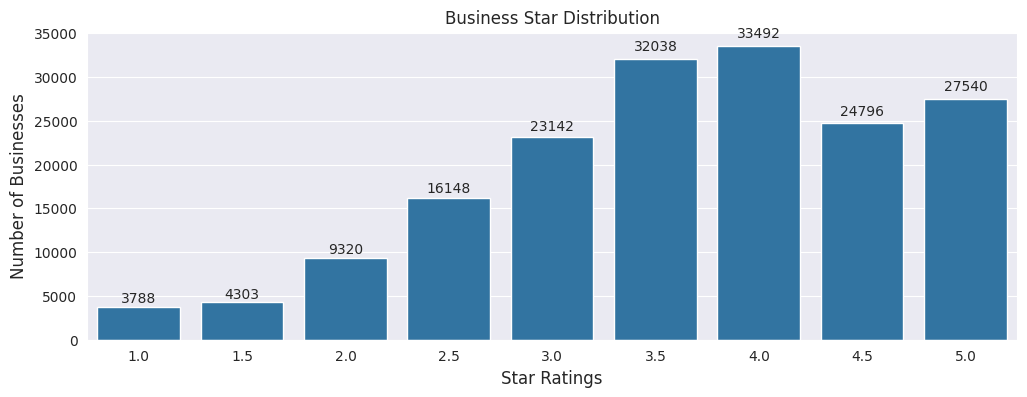

In [8]:
# Get the distribution of star ratings
data = business['stars'].value_counts()
data = data.sort_index()  # Sort by star rating

# Plot a bar chart
plt.figure(figsize=(12, 4))
ax = sns.barplot(x=data.index, y=data.values)
plt.title("Business Star Distribution")
plt.ylabel('Number of Businesses', fontsize=12)
plt.xlabel('Star Ratings', fontsize=12)

# Add label text on top of each bar
rects = ax.patches
labels = data.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height * 1.02, label, ha='center', va='bottom')

plt.show()

### 2.1.2 Top 20 Categories

In [9]:
business['categories']

0         Dentists;General Dentistry;Health & Medical;Or...
1         Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2         Departments of Motor Vehicles;Public Services ...
3                                   Sporting Goods;Shopping
4         American (New);Nightlife;Bars;Sandwiches;Ameri...
                                ...                        
174562                               Car Dealers;Automotive
174563                                Body Shops;Automotive
174564        Home Services;Property Management;Real Estate
174565                  Spray Tanning;Tanning;Beauty & Spas
174566                 Drugstores;Shopping;Health & Medical
Name: categories, Length: 174567, dtype: object

In [10]:
# Get the first category
business['categories'].str.split(';').str[0].reset_index(drop=True).value_counts()[:10]

categories
Restaurants         17842
Shopping             7181
Food                 7086
Beauty & Spas        5376
Home Services        4646
Health & Medical     3888
Automotive           3643
Local Services       2961
Nightlife            2682
Bars                 2205
Name: count, dtype: int64

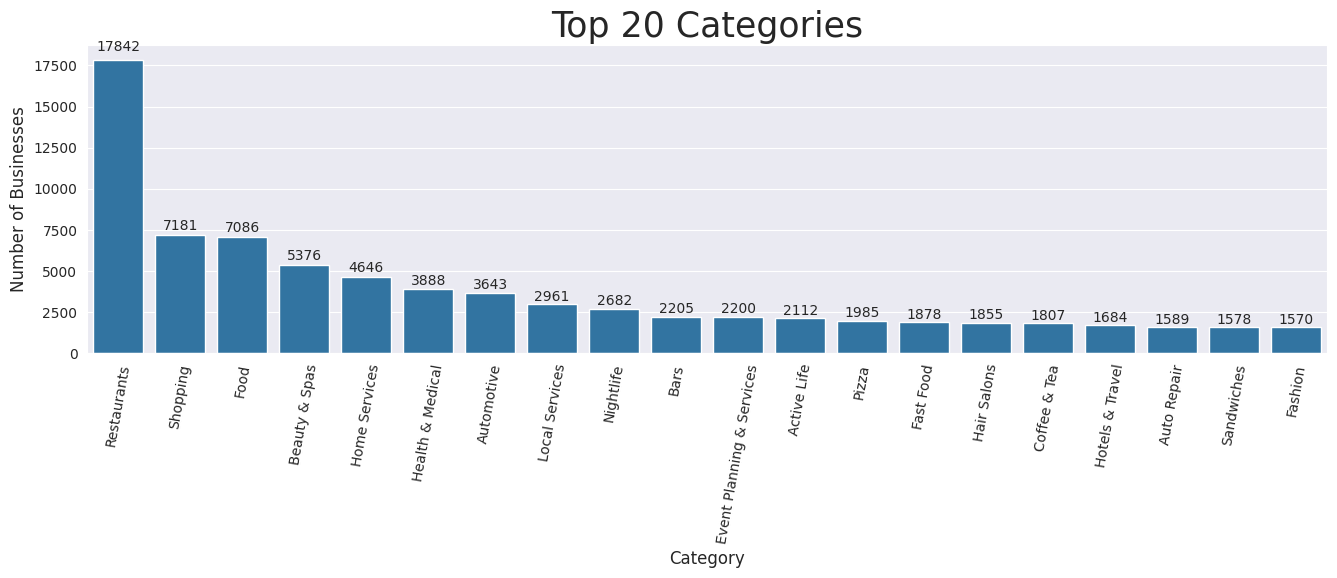

In [11]:
# Extract the first category from the 'categories' column
x = business['categories'].str.split(';').str[0].reset_index(drop=True).value_counts()

# Prepare data for the bar chart
x = x.sort_values(ascending=False)
x = x.iloc[0:20]  # Select only the top 20 categories for plotting

# Plot the bar chart
plt.figure(figsize=(16, 4))
ax = sns.barplot(x=x.index, y=x.values)
plt.title("Top 20 Categories", fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('Number of Businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)

# Add label text above each bar
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height * 1.02, label, ha='center', va='bottom')

plt.show()

### 2.1.3 Geospatial Mapping

#### Global Level

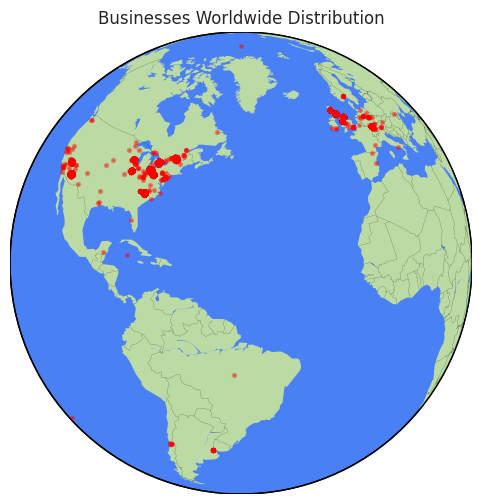

In [12]:
# Import necessary libraries
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Create a figure window with a specified size
plt.figure(1, figsize=(15, 6))

# Generate an Earth-like map using orthographic projection
m1 = Basemap(projection='ortho', lat_0=20, lon_0=-50)

# Fill continents and oceans with specified color codes
m1.fillcontinents(color='#bbdaa4', lake_color='#4384f3')

# Add ocean boundary with a specified fill color
m1.drawmapboundary(fill_color='#4a80f5')

# Draw country borders with specified line width and color
m1.drawcountries(linewidth=0.1, color="black")

# Plot business locations using scatter points based on latitude and longitude
mxy = m1(business["longitude"].tolist(), business["latitude"].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c="red", lw=2, alpha=0.4, zorder=5)

# Add a title to the map
plt.title("Businesses Worldwide Distribution")

# Display the map
plt.show()

#### District Level

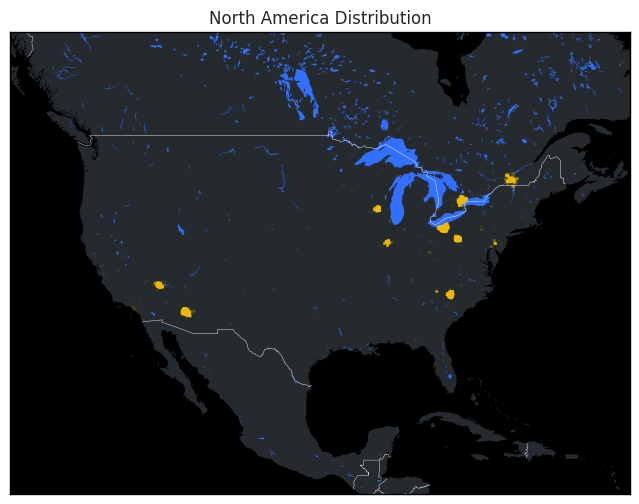

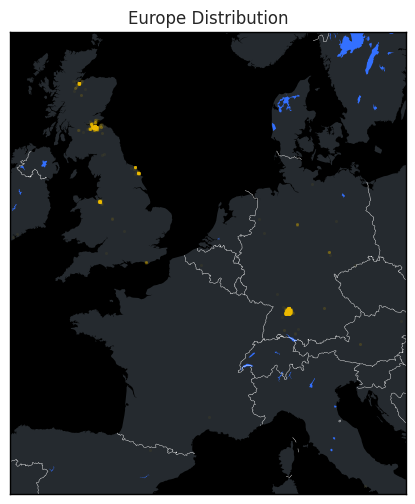

In [13]:
# Filter data to North America region
lon_min, lon_max = -132.714844, -59.589844
lat_min, lat_max = 13.976715, 56.395664

# Create a boolean mask
idx_NA = (business["longitude"] > lon_min) & \
         (business["longitude"] < lon_max) & \
         (business["latitude"] > lat_min) & \
         (business["latitude"] < lat_max)

# Apply the mask to get the North American subset
NA_business = business[idx_NA]

# Initialize North America map plot
plt.figure(figsize=(12, 6))
m2 = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='i')

m2.fillcontinents(color='#252a2f', lake_color='#3370ff')  # Dark gray land, blue lakes
m2.drawmapboundary(fill_color='#000000')  # Black background
m2.drawcountries(linewidth=0.3, color="w")  # White borders

# Plot business locations
mxy = m2(NA_business["longitude"].tolist(), NA_business["latitude"].tolist())
m2.scatter(mxy[0], mxy[1], s=5, c="#ffcc00", lw=0, alpha=0.05, zorder=5)

plt.title("North America Distribution")

# Filter data to Europe region
lon_min, lon_max = -8.613281, 16.699219
lat_min, lat_max = 40.488737, 59.204064

# Create a boolean mask
idx_euro = (business["longitude"] > lon_min) & \
           (business["longitude"] < lon_max) & \
           (business["latitude"] > lat_min) & \
           (business["latitude"] < lat_max)

# Apply the mask to get the European subset
euro_business = business[idx_euro]

# Initialize Europe map plot
plt.figure(figsize=(12, 6))
m3 = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='i')

m3.fillcontinents(color='#252a2f', lake_color='#3370ff')  # Dark gray land, blue lakes
m3.drawmapboundary(fill_color='#000000')  # Black background
m3.drawcountries(linewidth=0.3, color="w")  # White borders

# Plot business locations
mxy = m3(euro_business["longitude"].tolist(), euro_business["latitude"].tolist())
m3.scatter(mxy[0], mxy[1], s=5, c="#ffcc00", lw=0, alpha=0.05, zorder=5)

plt.title("Europe Distribution")
plt.show()

#### City Level（Las Vegas, Pheonix, Toronto, Edinburgh）
The bar chart above displays the top 20 cities with the highest number of businesses in the Yelp dataset.

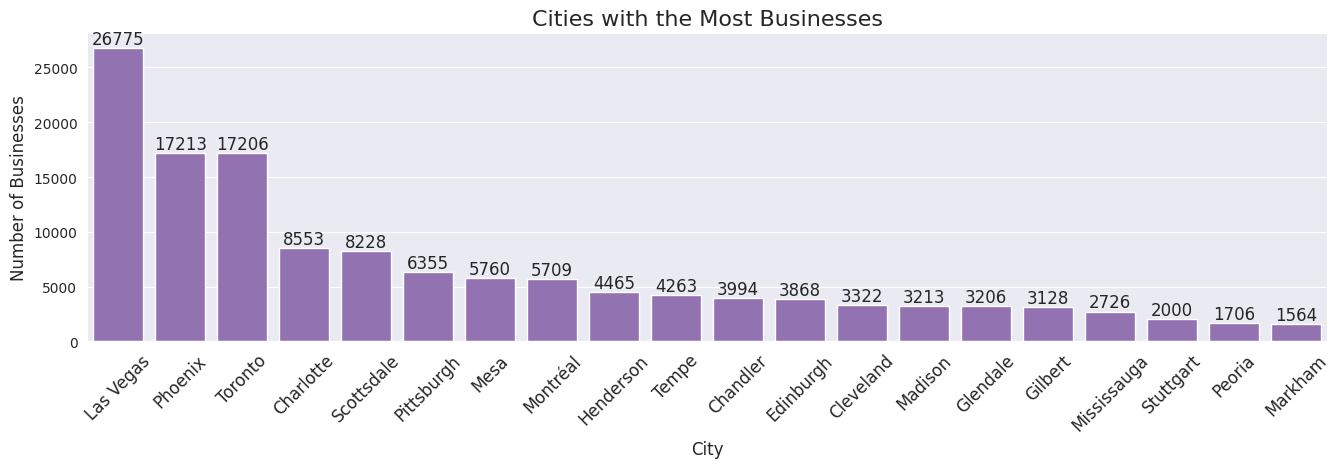

In [14]:
# Get the number of businesses per city
x = business['city'].value_counts()
x = x.sort_values(ascending=False)
x = x.iloc[0:20]  # Select top 20 cities

# Plot the bar chart
plt.figure(figsize=(16, 4))
ax = sns.barplot(x=x.index, y=x.values, color=color[4])  # Set bar color to color[4]
plt.title("Cities with the Most Businesses", fontsize=16)  # Set title and font size
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels and set font size
plt.ylabel('Number of Businesses', fontsize=12)  # Set y-axis label and font size
plt.xlabel('City', fontsize=12)  # Set x-axis label and font size

rects = ax.patches  # Get rectangle objects from the bar chart
labels = x.values  # Get label values for the bars

# Add numeric labels above each bar
for rect, label in zip(rects, labels):
    height = rect.get_height()  # Get height of each bar
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label,
            ha='center', va='bottom', fontsize=12)  # Place the label above the bar

plt.show()

In [15]:
rating_data = business[['latitude', 'longitude', 'stars', 'review_count']]

We selected these four cities—Las Vegas, Phoenix, Toronto, and Edinburgh—for more detailed city-level geospatial analysis

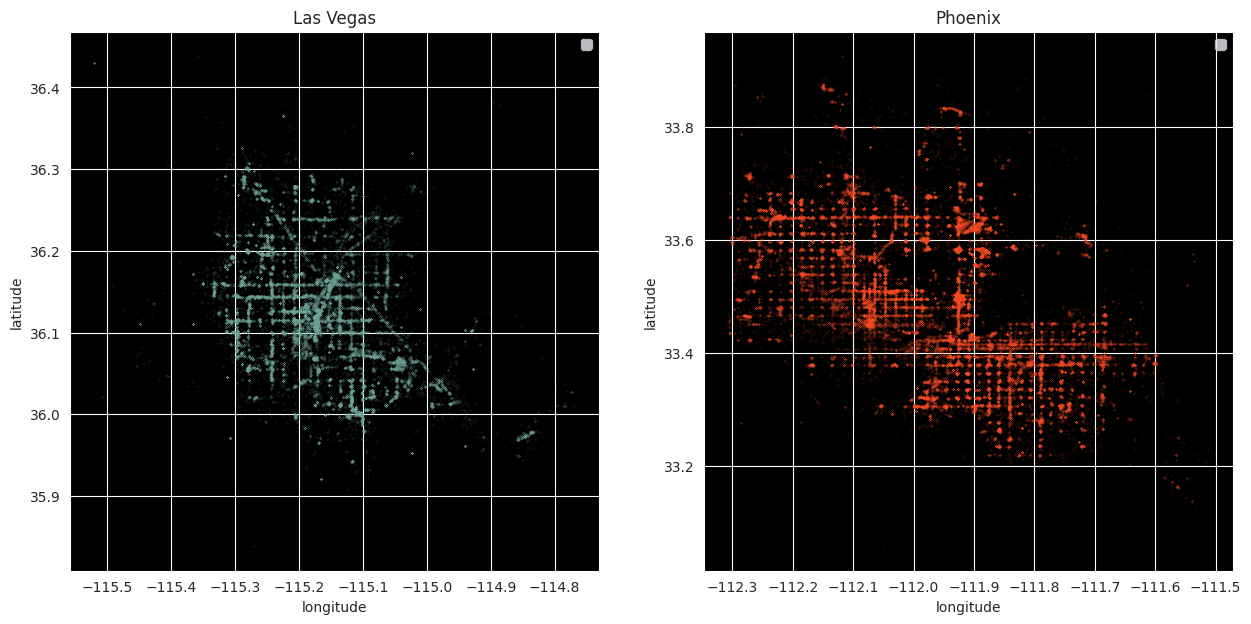

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))  # Create a canvas with two subplots, size 15x7

# Random point coordinates for Las Vegas
lat = 36.207430
lon = -115.268460
# Adjust coordinates to get an appropriate viewing window
lon_min, lon_max = lon - 0.3, lon + 0.5
lat_min, lat_max = lat - 0.4, lat + 0.5
# Filter data for Las Vegas based on latitude and longitude bounds
ratings_data_vegas = rating_data[(rating_data["longitude"] > lon_min) &
                                 (rating_data["longitude"] < lon_max) &
                                 (rating_data["latitude"] > lat_min) &
                                 (rating_data["latitude"] < lat_max)]

# Plot the scatter plot for Las Vegas
ratings_data_vegas.plot(kind='scatter', x='longitude', y='latitude',
                        color='#74a89b',
                        s=.02, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Las Vegas")
ax1.set_facecolor('black')

# Random point coordinates for Phoenix
lat = 33.435463
lon = -112.006989
# Adjust coordinates to get an appropriate viewing window
lon_min, lon_max = lon - 0.3, lon + 0.5
lat_min, lat_max = lat - 0.4, lat + 0.5
# Filter data for Phoenix based on latitude and longitude bounds
ratings_data_phoenix = rating_data[(rating_data["longitude"] > lon_min) &
                                   (rating_data["longitude"] < lon_max) &
                                   (rating_data["latitude"] > lat_min) &
                                   (rating_data["latitude"] < lat_max)]

# Plot the scatter plot for Phoenix
ratings_data_phoenix.plot(kind='scatter', x='longitude', y='latitude',
                          color='#fb4e29',
                          s=.02, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Phoenix")
ax2.set_facecolor('black')

f.show()


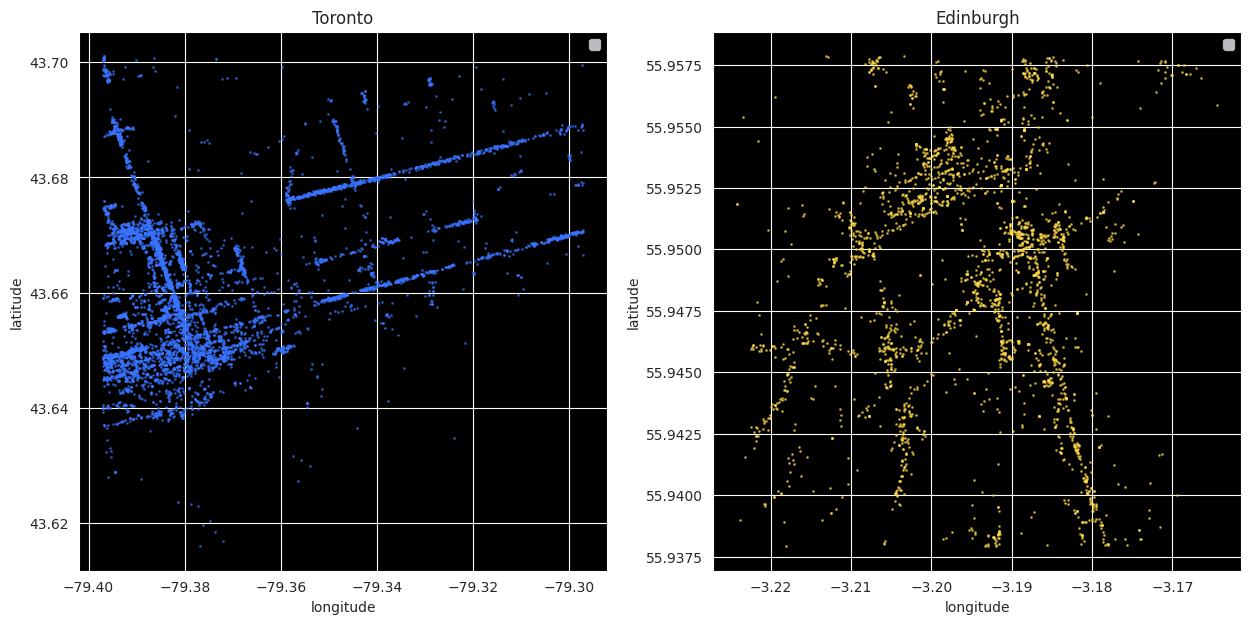

In [17]:
# Create a figure window with two subplots, size 15x7
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Randomly select a point within the city of Toronto
lat = 43.651070
lon = -79.347015
# Slightly adjust the coordinates to get a suitable viewing area
lon_min, lon_max = lon - 0.05, lon + 0.05
lat_min, lat_max = lat - 0.05, lat + 0.05
# Filter data within Toronto bounds
ratings_data_toronto = rating_data[(rating_data["longitude"] > lon_min) &
                                   (rating_data["longitude"] < lon_max) &
                                   (rating_data["latitude"] > lat_min) &
                                   (rating_data["latitude"] < lat_max)]

# Plot scatter plot for Toronto
ratings_data_toronto.plot(kind='scatter', x='longitude', y='latitude',
                          color='#3973fe',
                          s=1, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Toronto")
ax1.set_facecolor('black')

# Randomly select a point within the city of Edinburgh
lat = 55.947871
lon = -3.194255
# Slightly adjust the coordinates to get a suitable viewing area
lon_min, lon_max = lon - 0.03, lon + 0.03
lat_min, lat_max = lat - 0.01, lat + 0.01
# Filter data within Edinburgh bounds
ratings_data_edinburgh = rating_data[(rating_data["longitude"] > lon_min) &
                                     (rating_data["longitude"] < lon_max) &
                                     (rating_data["latitude"] > lat_min) &
                                     (rating_data["latitude"] < lat_max)]

# Plot scatter plot for Edinburgh
ratings_data_edinburgh.plot(kind='scatter', x='longitude', y='latitude',
                            color='#ffd949',
                            s=1, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Edinburgh")
ax2.set_facecolor('black')

# Show the figure
f.show()

#### Heatmap by Star Rating in Las Vegas (Folium)

In [18]:
data = []

# Reformat the data to fit the structure required by folium
stars_list = list(rating_data['stars'].sort_values().unique())  # Get a list of unique star rating values

for star in stars_list:  # Loop through each star rating
    subset = ratings_data_vegas[ratings_data_vegas['stars'] == star]  # Filter the data for that specific star rating
    data.append(subset[['latitude', 'longitude']].values.tolist())  # Convert the lat/lon values to a list and append to `data`

# Set map center coordinates (Las Vegas) and initial zoom level
lat = 36.127430
lon = -115.138460
zoom_start = 11

print("Vegas Review Heatmap Animation")

# Create a base folium map
m = folium.Map(location=[lat, lon], tiles="OpenStreetMap", zoom_start=zoom_start)

# Create a time-lapse heatmap using the HeatMapWithTime plugin
index_labels = [f"star {star}" for star in stars_list]
hm = plugins.HeatMapWithTime(data, max_opacity=0.3, auto_play=True,
                             index=index_labels, display_index=True, radius=7)

hm.add_to(m)  # Add the heatmap to the folium map
m  # Display the map


Vegas Review Heatmap Animation


#### Check-in Heatmap


In [19]:
def highlight_max(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

In [20]:
# Extract the hour of the day from the check-in time (convert to integer)
check_in['hour'] = check_in['hour'].apply(lambda x: str(x).split(':')[0]).astype(int)

# Create a pivot table: rows are hours, columns are weekdays, values are total check-ins
df = check_in.pivot_table(
    index='hour',
    columns='weekday',
    values='checkins',
    aggfunc='sum'
)

# Reorder the columns to reflect weekday order
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df = df[weekday_order]

# Create a color map
cm = sns.light_palette("orange", as_cmap=True)

# Use a custom function `highlight_max` to highlight the peak hour (max value) for each column in blue
df.style.apply(highlight_max, color='#679bff', axis=0)

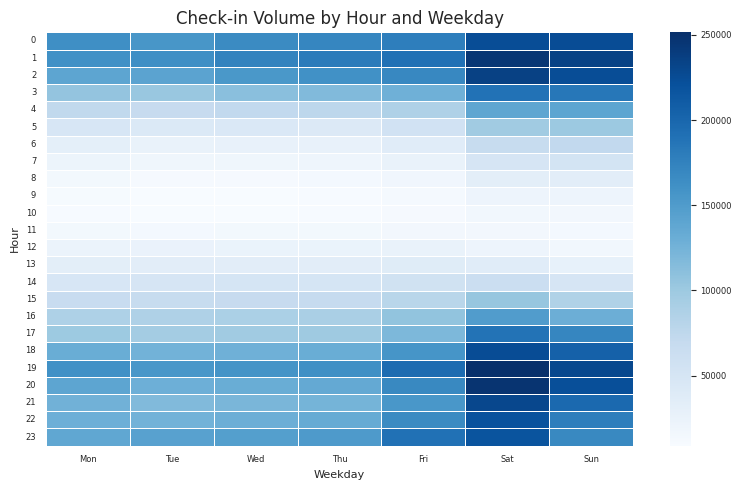

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
ax = sns.heatmap(df, cmap="Blues", linewidths=0.5, annot=False)

# Plot heatmap
plt.title("Check-in Volume by Hour and Weekday", fontsize=12)
plt.xlabel("Weekday", fontsize=8)
plt.ylabel("Hour", fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)

colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=6)

plt.tight_layout()
plt.show()



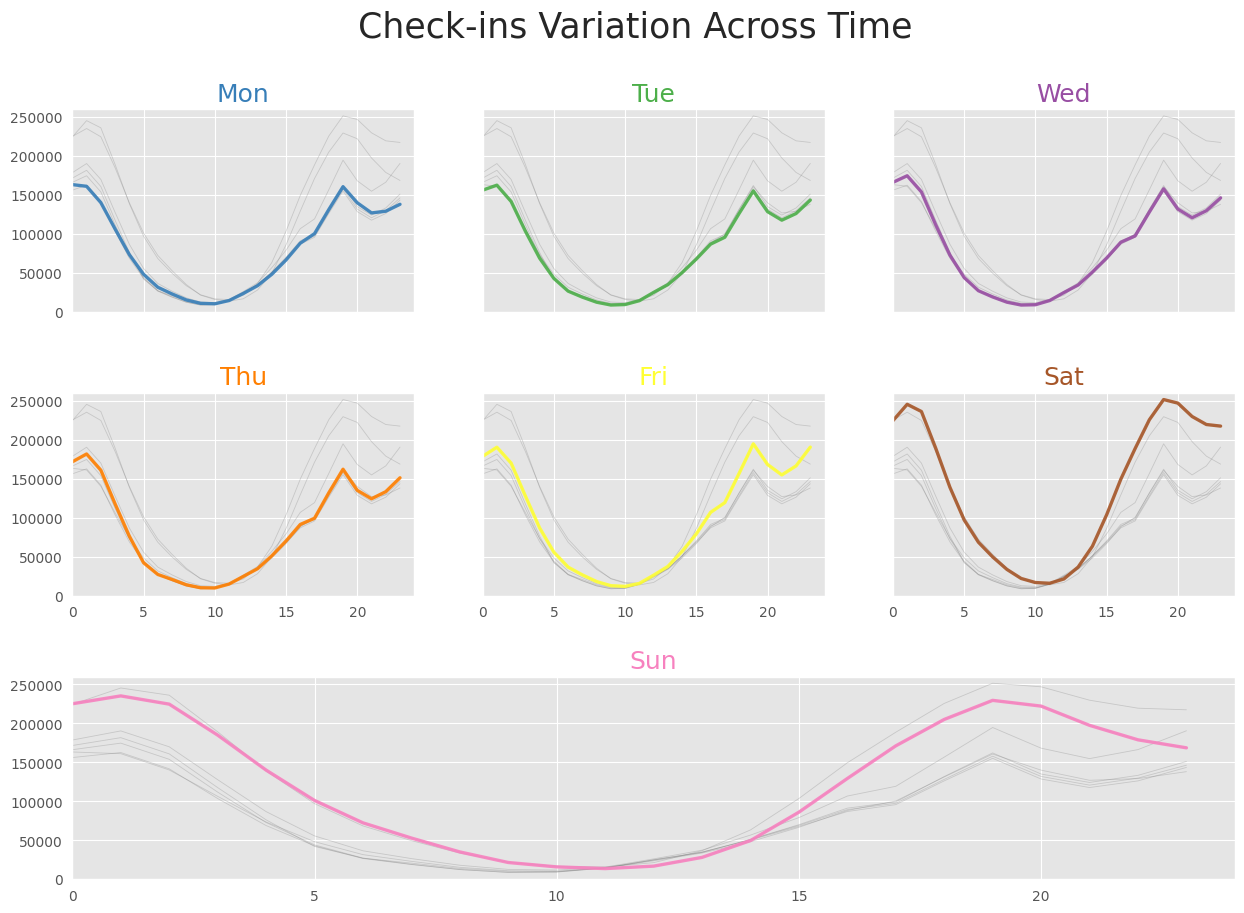

In [23]:
plt.style.use('ggplot')

# Set plot style using 'seaborn-darkgrid' (you can change this to your preferred style)

# Create a color palette
palette = plt.get_cmap('Set1')

# Create a figure with size (20, 10)
plt.figure(figsize=(15, 10))

# Add a main title
plt.suptitle("Check-ins Variation Across Time", fontsize=25)

# Set up a 3x3 grid layout
gridspec.GridSpec(3, 3)

# Adjust vertical spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Loop through each column (weekday) in the dataframe and plot
num = 0
for column in df:
    num += 1
    # Determine subplot position

    if num == 7:  # Adjust Sunday to span the entire bottom row
        plt.subplot2grid((3, 3), (2, 0), colspan=3)
    else:
        plt.subplot(3, 3, num)

    # Plot all lines in gray to show overall trends
    for v in df:
        plt.plot(df.index, df[v], marker='', color='grey', linewidth=0.6, alpha=0.3)

    # Highlight the current column (day) with a distinct color and label
    plt.plot(df.index, df[column], marker='', color=palette(num), linewidth=2.4, alpha=0.9, label=column)
    plt.xlim(0, 24)
    plt.ylim(-2, 260000)

    # Remove x-axis labels from some subplots
    if num in range(4):
        plt.tick_params(labelbottom=False)

    # Remove y-axis labels from some subplots
    if num not in [1, 4, 7]:
        plt.tick_params(labelleft=False)

    # Add subplot title
    plt.title(column, loc='center', fontsize=18, fontweight=0, color=palette(num))

## 2.2 User Overview

###  2.2.1 Active vs Elite Users by Year

#### Register Users

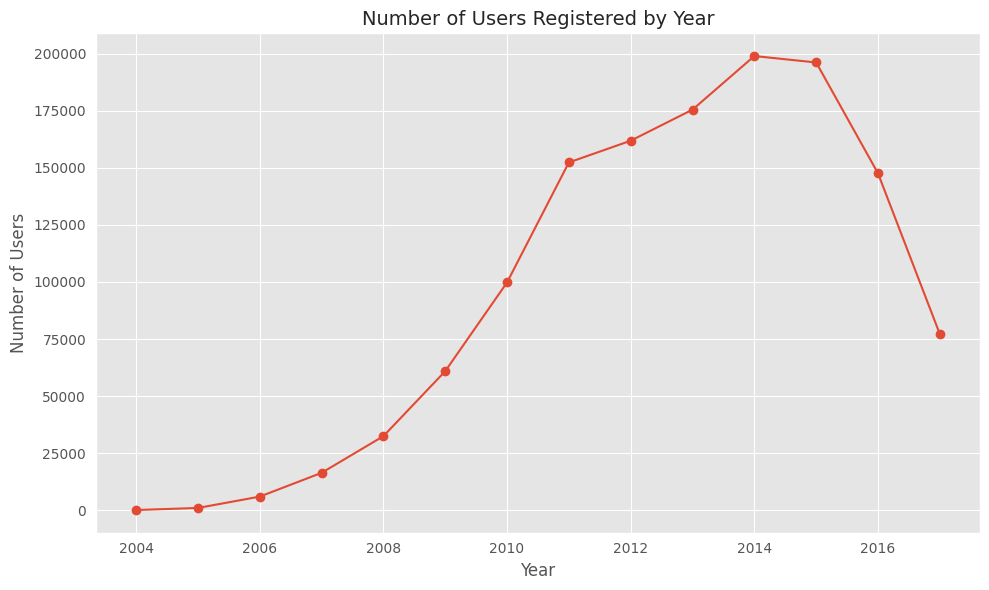

In [24]:
# Convert the 'yelping_since' column to datetime format
user['yelping_since'] = pd.to_datetime(user['yelping_since'], errors='coerce')

# Extract the registration year
user['register_year'] = user['yelping_since'].dt.year

# Group and count number of users registered per year
user_register = user.groupby('register_year')['user_id'].count().reset_index(name='user_count')

# Plot the result
plt.figure(figsize=(10, 6))
plt.plot(user_register['register_year'], user_register['user_count'], marker='o', linestyle='-')
plt.title('Number of Users Registered by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.tight_layout()
plt.show()

#### Active users

In [25]:
# Convert the 'date' column to datetime format
reviews['date'] = pd.to_datetime(reviews['date'])

# Extract the review year
reviews['year'] = reviews['date'].dt.year

# Calculate the number of reviews per user per year
user_active = pd.crosstab(reviews['user_id'], reviews['year'])

# For each user, count only once per year (i.e., mark active if they wrote at least one review)
user_active[user_active > 0] = 1

# Calculate the number of active users per year
user_active_summary = user_active.sum(axis=0).reset_index(name='active_count')

user_active_summary

year  active_count
0   2004             9
1   2005           142
2   2006          1207
3   2007          4479
4   2008         12282
5   2009         24396
6   2010         46276
7   2011         81967
8   2012        110689
9   2013        162560
10  2014        257090
11  2015        361921
12  2016        437130
13  2017        480154

#### Elite users

In [26]:
# Filter users who have non-null 'elite' values and select relevant columns
user_elite = user[~user['elite'].isna()][['user_id', 'elite']]

# Make a copy
user_elite_exploded = user_elite.copy()

# Split the 'elite' string into lists (e.g., "2015,2016,2017" → ['2015', '2016', '2017'])
user_elite_exploded['elite'] = user_elite_exploded['elite'].str.split(',')

# Explode the list so each row represents one elite year
user_elite_exploded = user_elite_exploded.explode('elite')

# Remove leading/trailing whitespace
user_elite_exploded['elite'] = user_elite_exploded['elite'].str.strip()

# Convert the 'elite' year to integer
user_elite_exploded['elite'] = user_elite_exploded['elite'].astype(int)

user_elite_exploded


user_id  elite
44       fV8Yr0c5tFQTQ2SRRJHXHw   2009
74       aw973Pm1nrTbRjP4zY9B9g   2014
74       aw973Pm1nrTbRjP4zY9B9g   2016
74       aw973Pm1nrTbRjP4zY9B9g   2013
74       aw973Pm1nrTbRjP4zY9B9g   2015
...                         ...    ...
1320134  jOfjBuI0zxJ7FFCO-kkwGg   2017
1321693  LD6kMBX7LUEVLYYW9z5vOw   2017
1324517  pDbS89qRWZ9yLvJ3UpTmLA   2015
1324517  pDbS89qRWZ9yLvJ3UpTmLA   2014
1325764  ZUjtrujFUynsLY7lHc2zow   2017

[187125 rows x 2 columns]

In [27]:
# Count the number of elite users by year
elite_count_by_year = user_elite_exploded.groupby('elite')['user_id'].nunique().reset_index(name='elite_user_count')

# Sort by year
elite_count_by_year = elite_count_by_year.sort_values('elite')

elite_count_by_year

elite  elite_user_count
0    2005               140
1    2006               887
2    2007              2363
3    2008              3621
4    2009              6536
5    2010             10485
6    2011             13185
7    2012             17777
8    2013             19841
9    2014             20488
10   2015             26018
11   2016             30856
12   2017             34928

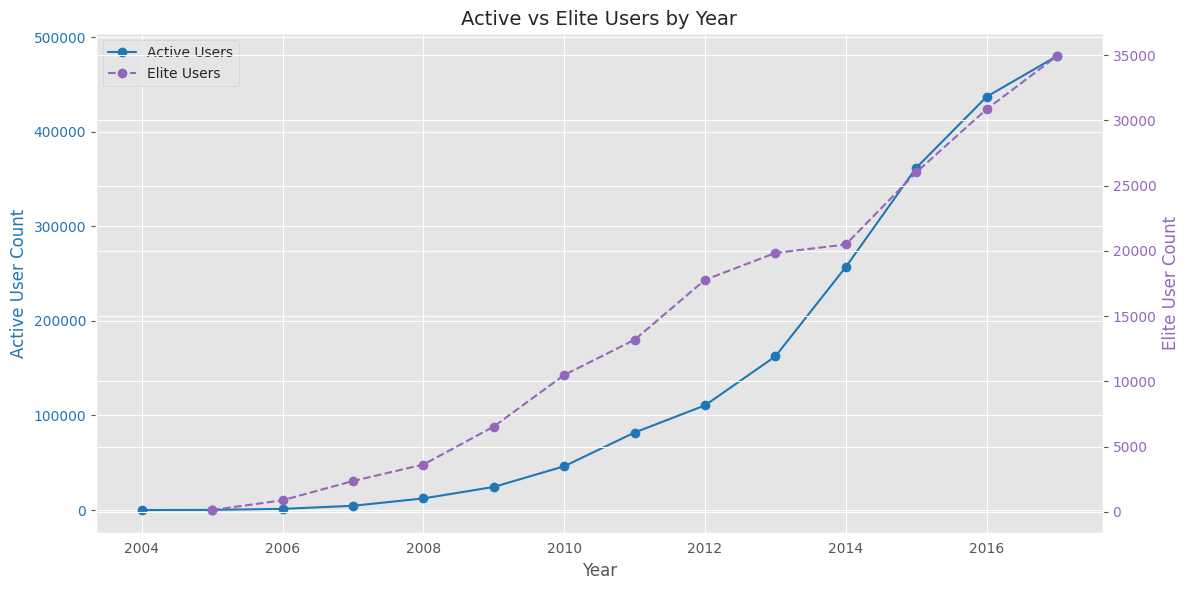

In [28]:
import matplotlib.pyplot as plt

# Create the figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primary Y-axis: Active users
ax1.plot(user_active_summary['year'], user_active_summary['active_count'],
         color='tab:blue', marker='o', label='Active Users')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Active User Count', color='tab:blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Secondary Y-axis: Elite users
ax2 = ax1.twinx()
ax2.plot(elite_count_by_year['elite'], elite_count_by_year['elite_user_count'],
         color='tab:purple', marker='o', linestyle='--', label='Elite Users')
ax2.set_ylabel('Elite User Count', color='tab:purple', fontsize=12)
ax2.tick_params(axis='y', labelcolor='tab:purple')

# Add a title
plt.title('Active vs Elite Users by Year', fontsize=14)

# Add combined legend for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()


### 2.2.2 Retention Rate by Year

#### All User Retention Rate

In [29]:
# Create an empty dictionary to store retention rates
retention_dict = {}

# Extract the list of years
years = sorted(user_active.columns)

# Calculate retention rate year by year
for i in range(len(years) - 1):
    year = years[i]
    next_year = years[i + 1]

    # Find users active in both the current year and the next year (intersection)
    active_this_year = user_active[user_active[year] == 1]
    retained = active_this_year[active_this_year[next_year] == 1]

    # Calculate retention rate
    retention_rate = len(retained) / len(active_this_year) if len(active_this_year) > 0 else None
    retention_dict[year] = round(retention_rate, 4)

# Convert to DataFrame
retention_df = pd.DataFrame(list(retention_dict.items()), columns=['year', 'retention_rate'])
retention_df


year  retention_rate
0   2004          0.0000
1   2005          0.2958
2   2006          0.3115
3   2007          0.3152
4   2008          0.2979
5   2009          0.3135
6   2010          0.3120
7   2011          0.2848
8   2012          0.3019
9   2013          0.3276
10  2014          0.3340
11  2015          0.3246
12  2016          0.3218

#### Elite User Retention Rate

In [33]:
# Create an empty dictionary to store retention rates
elite_retention_dict = {}

# Extract the list of years
years = sorted(user_elite_exploded['elite'].unique())

# Calculate elite retention rate year by year
for i in range(len(years) - 1):
    year = years[i]
    next_year = years[i + 1]

    # Find elite users active in both the current year and the next year (intersection)
    elite_this_year = set(user_elite_exploded[user_elite_exploded['elite'] == year]['user_id'])
    elite_next_year = set(user_elite_exploded[user_elite_exploded['elite'] == next_year]['user_id'])
    elite_retained = elite_this_year & elite_next_year

    #  Calculate elite retention rate
    elite_retention_rate = len(elite_retained) / len(elite_this_year) if len(elite_this_year) > 0 else None
    elite_retention_dict[year] = round(elite_retention_rate, 4)

# Convert to DataFrame
elite_retention_df = pd.DataFrame(list(elite_retention_dict.items()), columns=['year', 'elite_retention_rate'])
elite_retention_df

year  elite_retention_rate
0   2005                0.9429
1   2006                0.8929
2   2007                0.7165
3   2008                0.8175
4   2009                0.8277
5   2010                0.7973
6   2011                0.7992
7   2012                0.8474
8   2013                0.7702
9   2014                0.8159
10  2015                0.8367
11  2016                0.8198

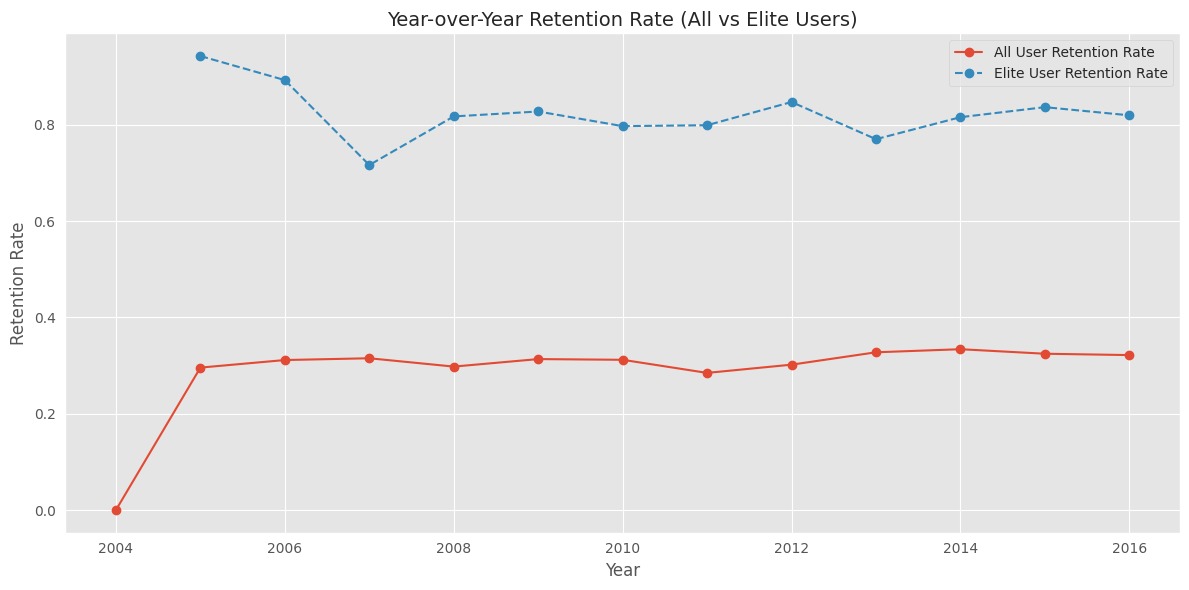

In [35]:
import matplotlib.pyplot as plt

# Create the figure
plt.figure(figsize=(12, 6))

# Retention rate for all users
plt.plot(retention_df['year'], retention_df['retention_rate'],
         marker='o', linestyle='-', label='All User Retention Rate')

# Retention rate for elite users
plt.plot(elite_retention_df['year'], elite_retention_df['elite_retention_rate'],
         marker='o', linestyle='--', label='Elite User Retention Rate')

# Plot
plt.title('Year-over-Year Retention Rate (All vs Elite Users)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Retention Rate', fontsize=12)
plt.legend()
plt.tight_layout()

plt.show()

### 2.2.3 Elite vs Non-Elite User Behavior Comparison

In [36]:
# Group users by elite status (True = non-elite, False = elite)
user_summary = user.groupby(user['elite'].isna()).agg({
    'average_stars': 'mean',
    'fans': 'mean',
    'review_count': ['mean', 'sum'],
    'useful': 'sum',
    'funny': 'sum',
    'cool': 'sum'
})

# Rename the columns
user_summary.columns = ['avg_star', 'avg_fans', 'avg_review', 'total_reviews',
                        'total_useful', 'total_funny', 'total_cool']

# Calculate reaction rates per review
user_summary['useful_rate'] = user_summary['total_useful'] / user_summary['total_reviews']
user_summary['funny_rate'] = user_summary['total_funny'] / user_summary['total_reviews']
user_summary['cool_rate'] = user_summary['total_cool'] / user_summary['total_reviews']

# Select relevant columns
user_summary = user_summary[[
    'avg_star', 'avg_fans', 'avg_review',
    'useful_rate', 'funny_rate', 'cool_rate'
]]

# Rename index to label Elite vs Non-Elite
user_summary.index = user_summary.index.map({False: 'Elite', True: 'Non-Elite'})
user_summary = user_summary.round(2)

user_summary


avg_star  avg_fans  avg_review  useful_rate  funny_rate  cool_rate
elite                                                                        
Elite          3.85     21.94      226.88         2.10        1.14       1.63
Non-Elite      3.70      0.47       13.32         0.59        0.21       0.21

### 2.2.4 Most Engaged User Behavior Stalking


In [37]:
# Sample 100000 from 1 million records from reviews dataset
user_agg=reviews.sample(100000).groupby('user_id').agg(
            {'review_id':['count'],
             'date':['min','max'],
             'useful':['sum'],
             'funny':['sum'],
             'cool':['sum'],
             'stars':['mean']})

In [38]:
user_agg=user_agg.sort_values([('review_id','count')],ascending=False)
print("          Top 10 Users in Yelp")
user_agg.head(10)

          Top 10 Users in Yelp


review_id       date            useful funny cool  \
                           count        min        max    sum   sum  sum   
user_id                                                                    
CxDOIDnH8gp9KXzpBHJYXw        72 2009-11-21 2017-02-07    189    94  109   
PKEzKWv_FktMm2mGPjwd0Q        36 2010-09-01 2017-11-08    233    88  155   
bLbSNkLggFnqwNNzzq-Ijw        33 2014-04-24 2017-08-17    396   201  248   
DK57YibC5ShBmqQl97CKog        29 2008-06-28 2017-09-17    331   159  276   
d_TBs6J3twMy9GChqUEXkg        26 2010-12-27 2017-07-28     69    31   38   
Q9mA60HnY87C1TW5kjAZ6Q        25 2012-07-01 2017-10-02    126    73  110   
cMEtAiW60I5wE_vLfTxoJQ        25 2010-05-10 2017-06-16     40    17   35   
QJI9OSEn6ujRCtrX06vs1w        24 2010-06-15 2014-02-08    170    76  124   
ELcQDlf69kb-ihJfxZyL0A        23 2011-06-18 2017-04-25     39    27   26   
3nDUQBjKyVor5wV0reJChg        21 2010-08-05 2016-02-10    218   120  171   

                           stars  
                            mean  
user_id                           
CxDOIDnH8gp9KXzpBHJYXw  3.277778  
PKEzKWv_FktMm2mGPjwd0Q  3.750000  
bLbSNkLggFnqwNNzzq-Ijw  3.333333  
DK57YibC5ShBmqQl97CKog  3.931034  
d_TBs6J3twMy9GChqUEXkg  3.192308  
Q9mA60HnY87C1TW5kjAZ6Q  3.920000  
cMEtAiW60I5wE_vLfTxoJQ  4.160000  
QJI9OSEn6ujRCtrX06vs1w  3.458333  
ELcQDlf69kb-ihJfxZyL0A  3.217391  
3nDUQBjKyVor5wV0reJChg  3.904762

In [55]:
# Stalking the most engaged user:
top_user_reviews = reviews[reviews['user_id'] == 'CxDOIDnH8gp9KXzpBHJYXw']

# Get location information for the user's reviewed businesses
top_user_locs = pd.merge(top_user_reviews, business, on='business_id')

top_user_locs['date'] = top_user_locs['date'].dt.strftime('%Y-%m-%d')

# Get a sorted list of unique review dates
date_list = sorted(top_user_locs['date'].unique())

# Reformat the data to fit the format required by the Folium library
data = []
for date in date_list:
    subset = top_user_locs[top_user_locs['date'] == date]
    df = subset[['latitude', 'longitude', 'date']]
    # Extract latitude and longitude values
    data.append(subset[['latitude', 'longitude']].values.tolist())

In [57]:
# Initialize the map centered at Ontario, Canada (latitude: 43.860397, longitude: -79.303184), with zoom level 9
lat = 43.860397
lon = -79.303184
zoom_start = 9

print("                     Stalking the Top User")

# Create the base map using the CartoDB Positron tile style
m = folium.Map(location=[lat, lon], tiles="Cartodb Positron", zoom_start=zoom_start)

# Create a time-enabled heatmap with the data and date index
hm = plugins.HeatMapWithTime(data, max_opacity=0.3, auto_play=True, display_index=True, index=date_list)

# Add the heatmap to the map
hm.add_to(m)

# Display the map
m

                     Stalking the Top User


## 2.3 Review Overview

### 2.3.1 Review Frequency

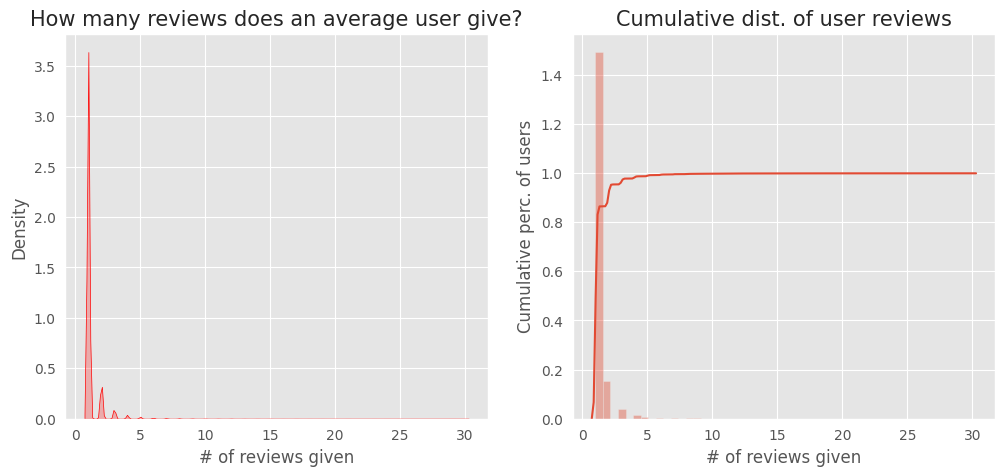

Took 2033.422315120697 s


In [58]:
# Cap max reviews to 30 for better visuals
user_agg[('review_id','count')].loc[user_agg[('review_id','count')]>30] = 30
plt.figure(figsize=(12,5))
gridspec.GridSpec(1,2)
plt.subplot2grid((1,2),(0,0))
#Cumulative Distribution
ax=sns.kdeplot(user_agg[('review_id','count')],shade=True,color='r')
plt.title("How many reviews does an average user give?",fontsize=15)
plt.xlabel('# of reviews given', fontsize=12)
plt.ylabel('Density', fontsize=12)

#Cumulative Distribution
plt.subplot2grid((1,2),(0,1))
sns.distplot(user_agg[('review_id','count')],
             kde_kws=dict(cumulative=True))
plt.title("Cumulative dist. of user reviews",fontsize=15)
plt.ylabel('Cumulative perc. of users', fontsize=12)
plt.xlabel('# of reviews given', fontsize=12)

plt.show()
end_time=time.time()
print("Took",end_time-start_time,"s")

~80% of the users write only about 1 reviews!

### 2.3.2 Review Usefulness

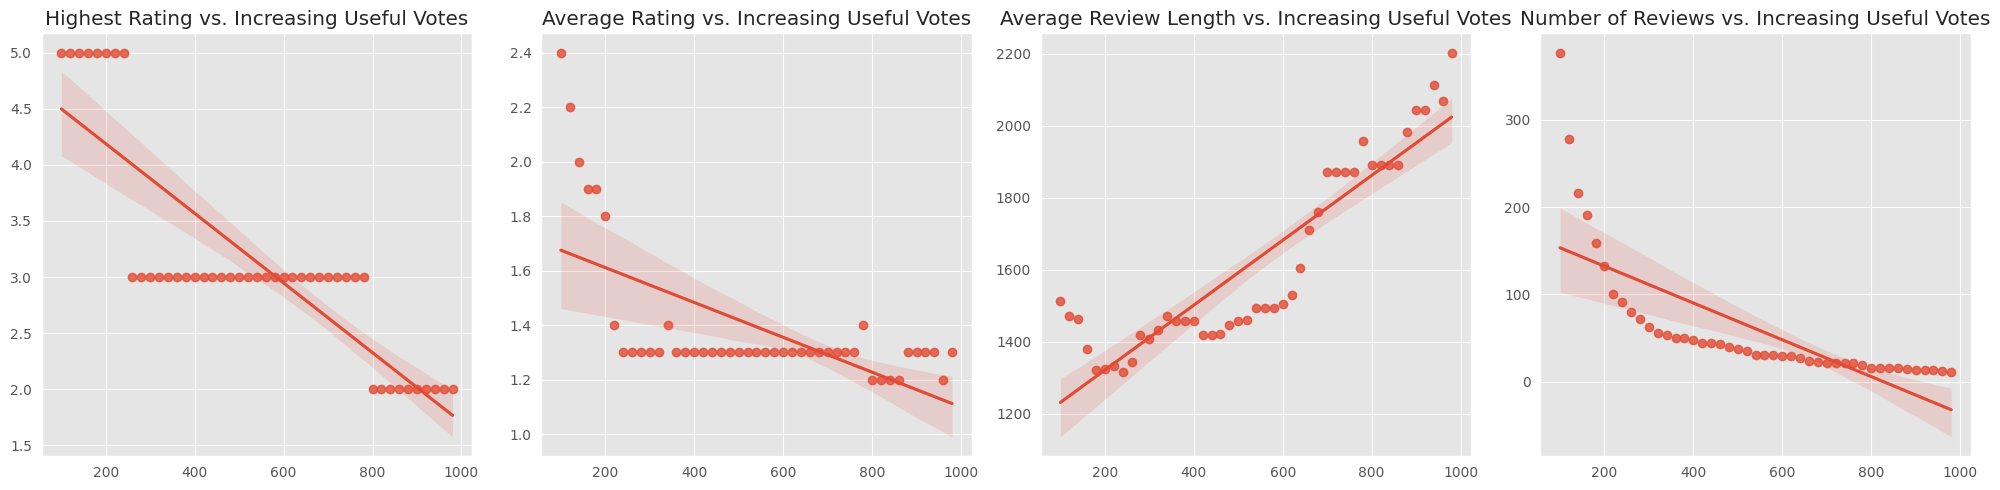

In [59]:
# Filter reviews that received at least one 'useful', 'funny', and 'cool' vote
reviews = reviews.query('useful > 0 and funny > 0 and cool > 0')

# Define a list of usefulness score thresholds
thresholds = [x for x in range(100, 1000, 20)]

# For each threshold, compute metrics based on reviews with 'useful' > threshold
max_star = [round(reviews.query('useful > @thres').stars.max(), 1) for thres in thresholds]
avg_star = [round(reviews.query('useful > @thres').stars.mean(), 1) for thres in thresholds]
avg_review_len = [reviews.query('useful > @thres')['text'].agg(lambda x: len(x)).agg('mean') for thres in thresholds]
n_review = [reviews.query('useful > @thres').stars.count() for thres in thresholds]

# Plot scatter plots with regression lines using seaborn's regplot
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.regplot(x=thresholds, y=max_star, ax=axes[0])
axes[0].set_title('Highest Rating vs. Increasing Useful Votes')

sns.regplot(x=thresholds, y=avg_star, ax=axes[1])
axes[1].set_title('Average Rating vs. Increasing Useful Votes')

sns.regplot(x=thresholds, y=avg_review_len, ax=axes[2])
axes[2].set_title('Average Review Length vs. Increasing Useful Votes')

sns.regplot(x=thresholds, y=n_review, ax=axes[3])
axes[3].set_title('Number of Reviews vs. Increasing Useful Votes')

plt.tight_layout()
plt.show()

### 2.3.3 Review Funny

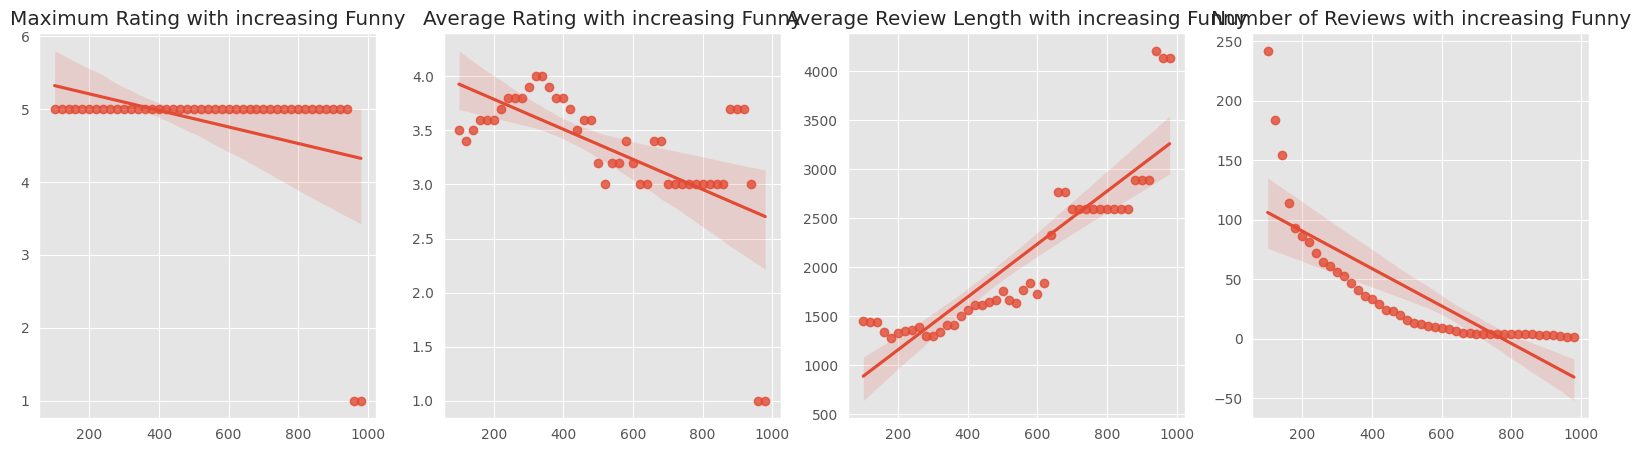

In [60]:
thresholds = [x for x in range(100,1000,20)]
max_star = [round(reviews.query('funny>@thres').stars.max(),1) for thres in thresholds]
avg_star = [round(reviews.query('funny>@thres').stars.mean(),1) for thres in thresholds]
avg_review_len = [reviews.query('funny>@thres')['text'].agg(lambda x: len(x)).agg('mean') for thres in thresholds]
n_review = [reviews.query('funny>@thres').stars.count() for thres in thresholds]

fig, axes = plt.subplots(1, 4, figsize = [20,5])
sns.regplot(x=thresholds, y=max_star,ax = axes[0])
axes[0].title.set_text('Maximum Rating with increasing Funny')

sns.regplot(x=thresholds, y=avg_star,ax = axes[1])
axes[1].title.set_text('Average Rating with increasing Funny')

sns.regplot(x=thresholds, y=avg_review_len,ax = axes[2])
axes[2].title.set_text('Average Review Length with increasing Funny')

sns.regplot(x=thresholds, y=n_review,ax = axes[3])
axes[3].title.set_text('Number of Reviews with increasing Funny')

#3.Sentiment Analysis

## 3.1 Sentiment Analysis by User Groups

In [61]:
from textblob import TextBlob

In [ ]:
%%time  # Measure the execution time of the cell

# Get the user IDs of elite and non-elite users
elite_ids = user[user['elite'].notnull()]['user_id']
regular_elite_ids = user[user['elite'].isnull()]['user_id']

# Calculate sentiment polarity of reviews written by elite users in 2012
elite_review_sentiment_score_2012 = reviews[
    (reviews['user_id'].isin(elite_ids)) &
    (reviews['date'].dt.year == 2012)
]['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Calculate sentiment polarity of reviews written by non-elite users in 2012
regular_review_sentiment_score_2012 = reviews[
    (reviews['user_id'].isin(regular_elite_ids)) &
    (reviews['date'].dt.year == 2012)
]['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

CPU times: user 1min 29s, sys: 350 ms, total: 1min 29s
Wall time: 1min 37s


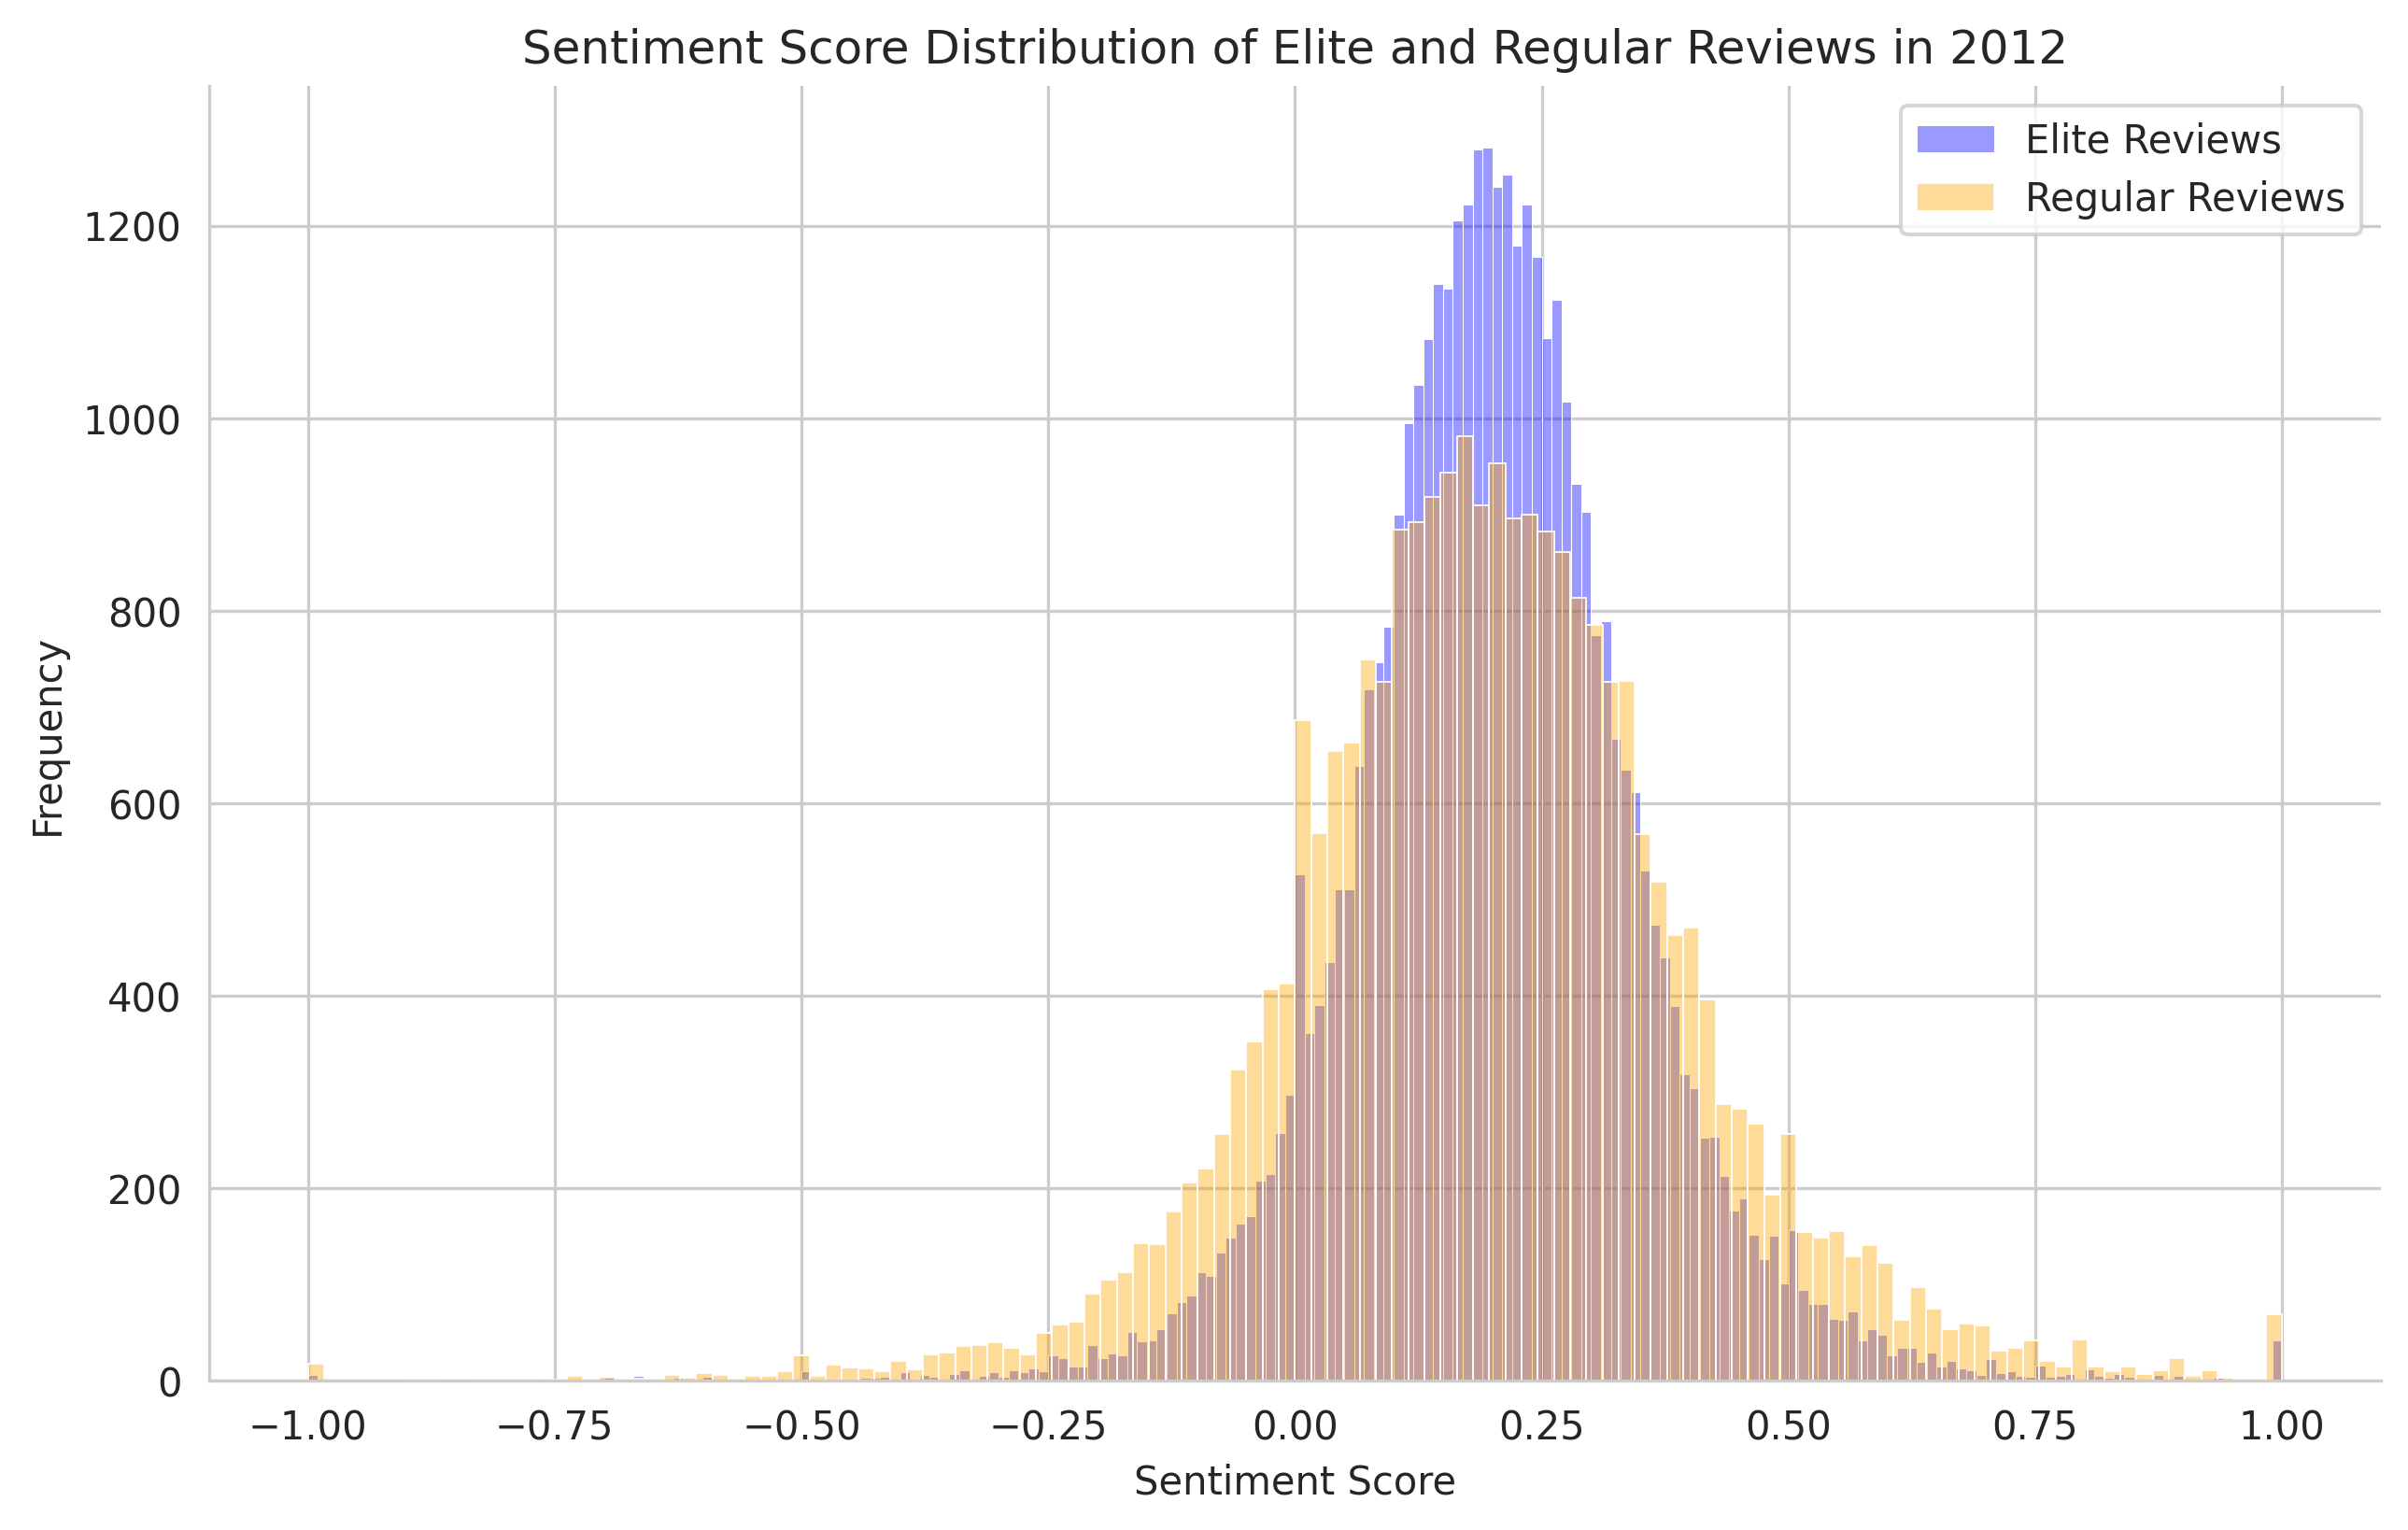

In [ ]:
# Set high resolution for the figure
plt.rcParams['figure.dpi'] = 300
sns.set_style("whitegrid")

# Create the figure
plt.figure(figsize=(10, 6))

# Plot sentiment score distribution for elite reviews (histogram)
sns.histplot(elite_review_sentiment_score_2012, alpha=0.4, color='blue', label='Elite Reviews')

# Plot sentiment score distribution for regular reviews (histogram)
sns.histplot(regular_review_sentiment_score_2012, alpha=0.4, color='orange', label='Regular Reviews')

# Add plot title and axis labels
plt.title('Sentiment Score Distribution of Elite and Regular Reviews in 2012')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()

# Remove top and right border lines
sns.despine()

plt.show()


## 3.2 Word Clouds for Positive and Negative Reviews

In [ ]:
import nltk
from textblob import TextBlob

# Download necessary NLTK corpora used by TextBlob
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
import matplotlib
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from textblob import TextBlob

def senti_word_cloud(s, max_words=200, min_polarity=0.3, min_subjectivity=0.5):
    # Set canvas size for the plots
    matplotlib.rcParams['figure.figsize'] = (20, 10)

    # Initialize WordCloud instances with stopwords
    wc_neg = WordCloud(
        background_color="black",
        max_words=max_words,
        stopwords=STOPWORDS,
        width=1920,
        height=1080
    )
    wc_pos = WordCloud(
        background_color="white",
        max_words=max_words,
        stopwords=STOPWORDS,
        width=1920,
        height=1080
    )

    # Initialize lists to hold positive and negative text
    positivelist = []
    negativelist = []

    # Analyze each review: apply sentiment + subjectivity filtering
    for each in s:
        if isinstance(each, str) and each.strip() != "":
            blob = TextBlob(each)
            polarity = blob.sentiment.polarity
            subjectivity = blob.sentiment.subjectivity

            if subjectivity >= min_subjectivity:  # Filter out more objective reviews
                if polarity > min_polarity:
                    positivelist.append(" ".join(blob.words))  # Token-level granularity
                elif polarity < -min_polarity:
                    negativelist.append(" ".join(blob.words))

    # Combine the word lists into strings for word cloud input
    positive_string = " ".join(positivelist)
    negative_string = " ".join(negativelist)

    # Create side-by-side word clouds for positive and negative sentiment
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))

    wc_neg.generate(negative_string)
    axes[0].imshow(wc_neg, interpolation='bilinear')
    axes[0].set_title('Negative Sentiment', fontsize=16)
    axes[0].axis('off')

    wc_pos.generate(positive_string)
    axes[1].imshow(wc_pos, interpolation='bilinear')
    axes[1].set_title('Positive Sentiment', fontsize=16)
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
# Randomly sample 10,000 reviews and generate the sentiment word clouds
senti_word_cloud(reviews['text'].sample(10000), max_words=100)

Output hidden; open in https://colab.research.google.com to view.

## 3.3 Sentiment Analysis on a Top-Rated Business

Business with most Five Star Reviews from Users

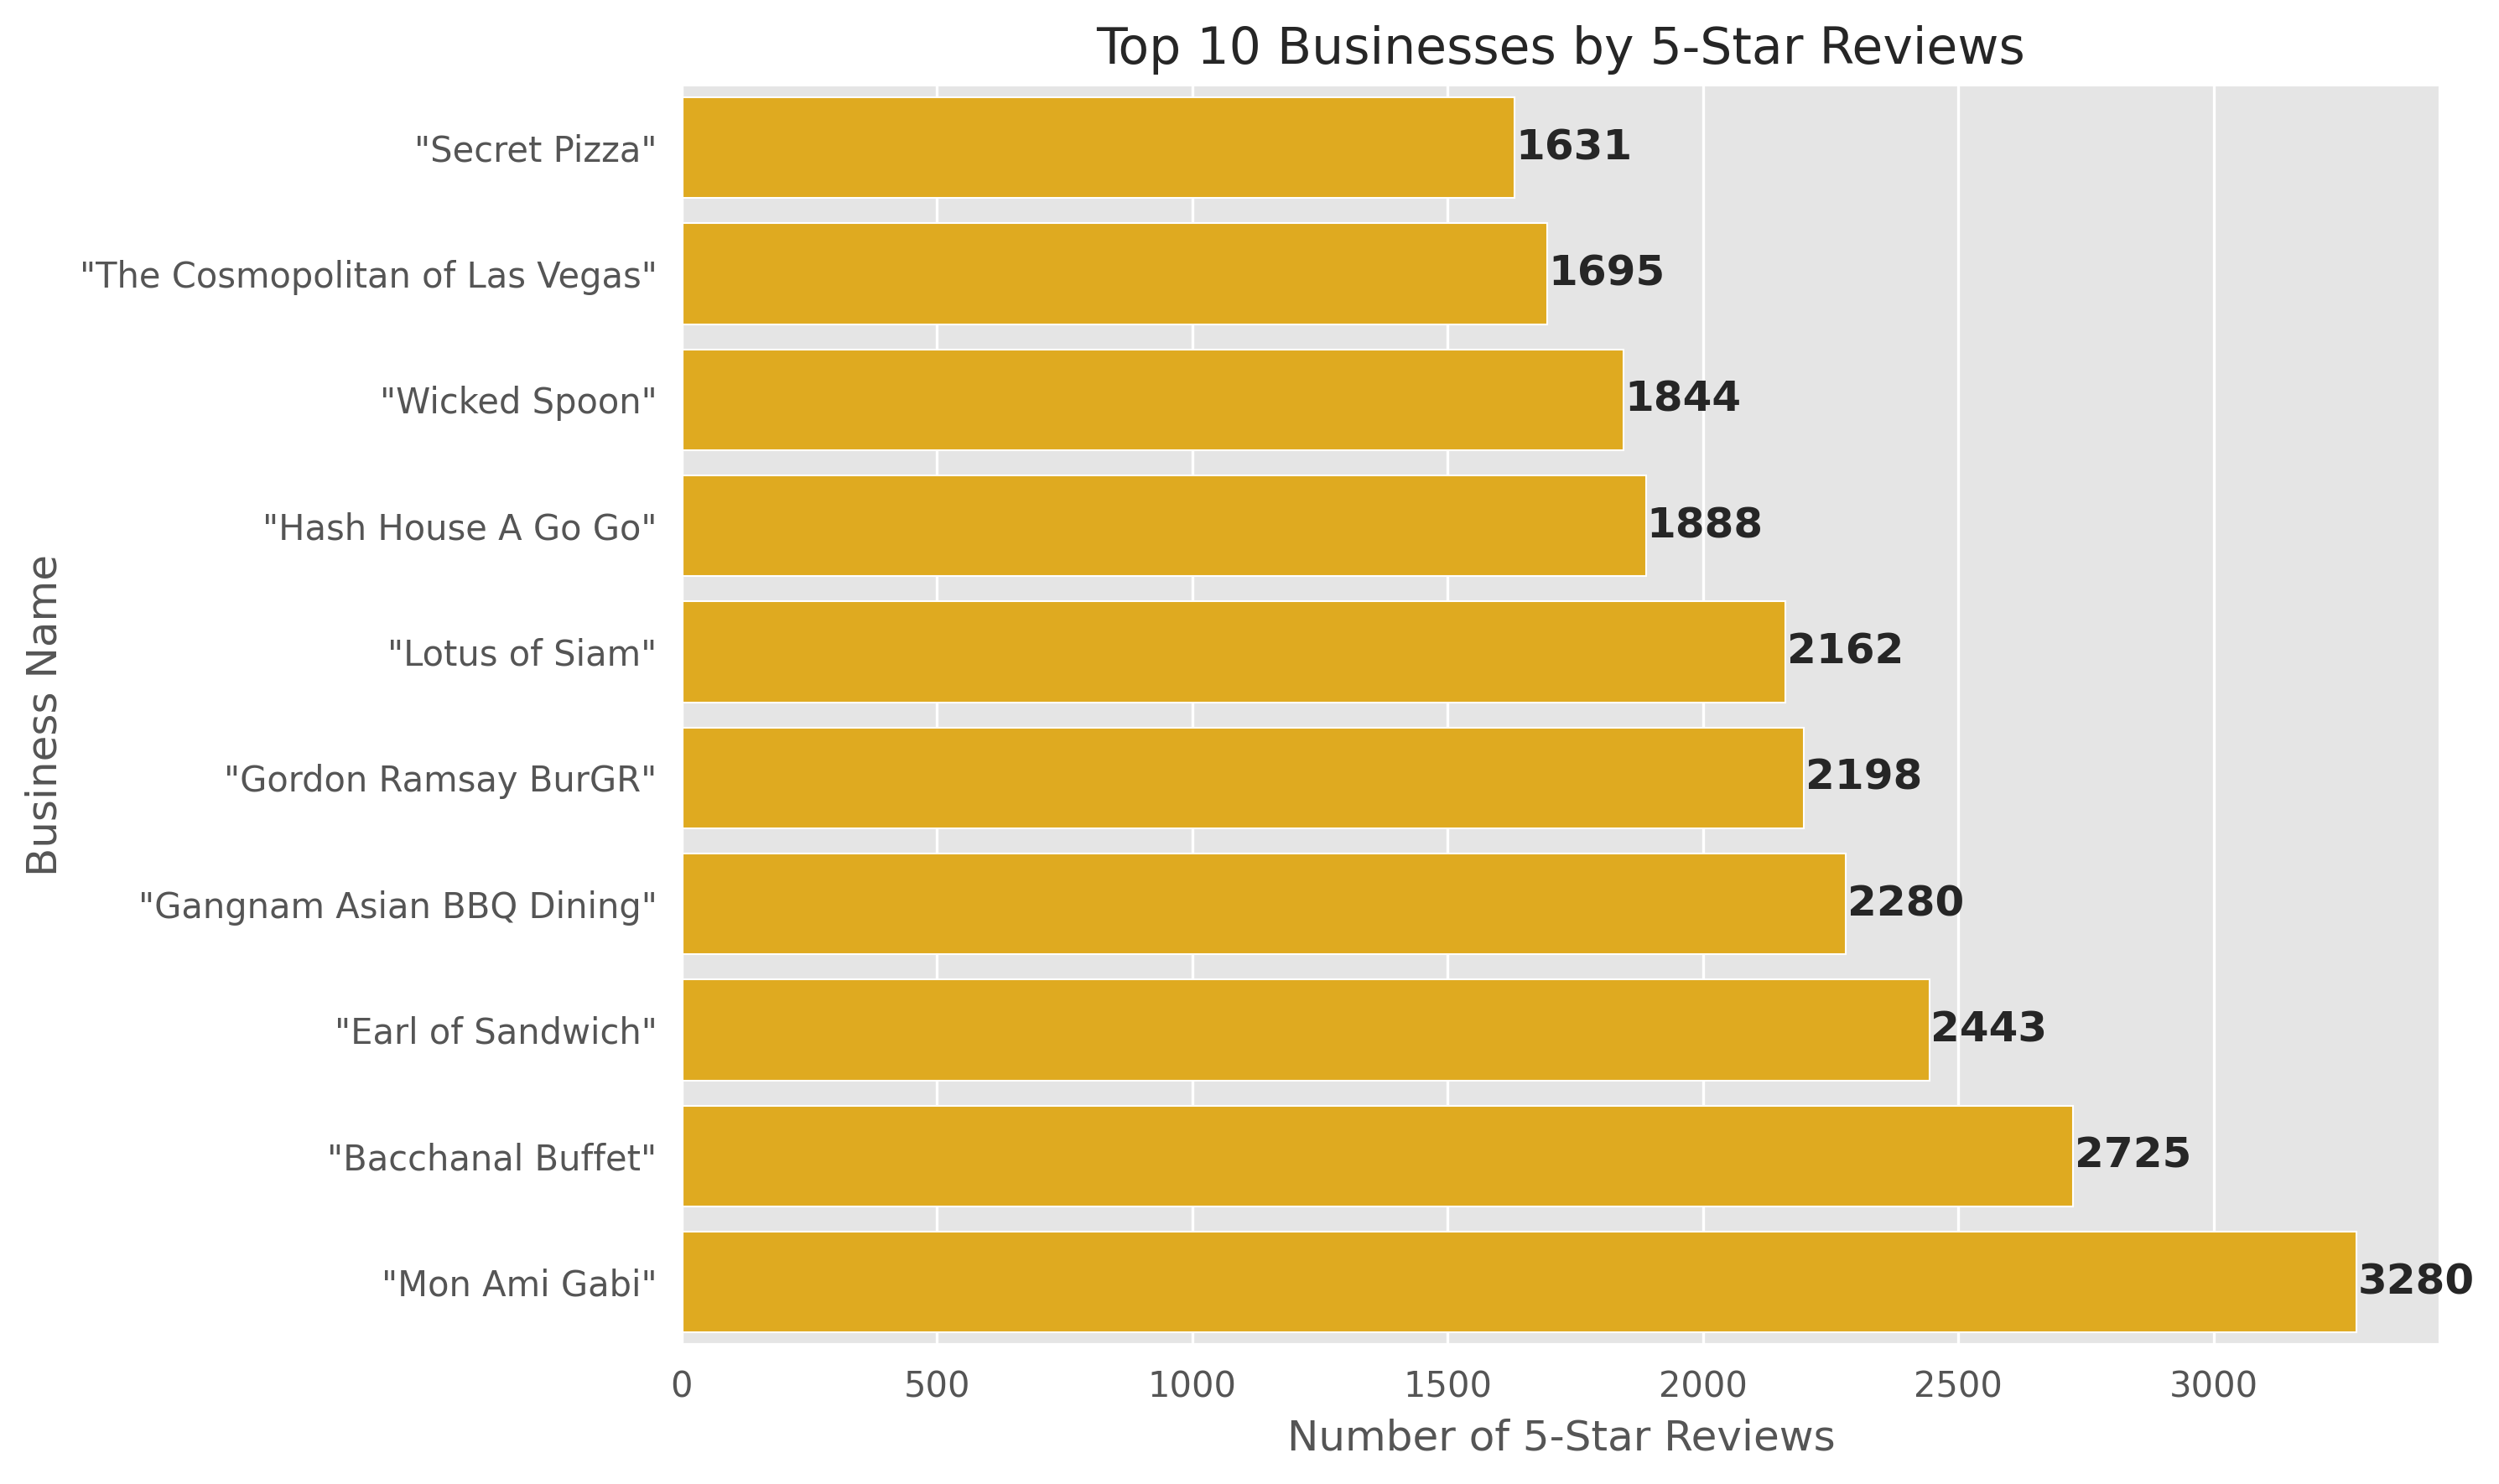

In [ ]:
# Filter 5-star reviews and count them by business_id
most5StarsReviews = reviews[reviews['stars'] == 5] \
    .groupby('business_id') \
    .size() \
    .reset_index(name='Count') \
    .sort_values(by='Count', ascending=False) \
    .head(10)

# Merge to get business names
most5StarsReviews = pd.merge(most5StarsReviews, business, on='business_id', how='inner')

# Sort in ascending order of count for a bottom-to-top horizontal bar chart
most5StarsReviews = most5StarsReviews.sort_values(by='Count')

# Plot
plt.figure(figsize=(10, 6))
fillColor = '#ffb800'
ax = sns.barplot(x='Count', y='name', data=most5StarsReviews, color=fillColor, edgecolor='white')

# Add text annotations next to each bar
for i, v in enumerate(most5StarsReviews['Count']):
    ax.text(v + 2, i, str(v), va='center', fontsize=12, fontweight='bold')

# Add labels and title
plt.xlabel('Number of 5-Star Reviews')
plt.ylabel('Business Name')
plt.title('Top 10 Businesses by 5-Star Reviews')
sns.set_style('whitegrid')
plt.tight_layout()
plt.show()

Choose Top-Rated Business—Gen Korean BBQ House for Analysis

In [ ]:
business[business['name'] == '"Gen Korean BBQ House"']

business_id                    name neighborhood  \
14969   eLFfWcdb7VkqNyTONksHiQ  "Gen Korean BBQ House"          NaN   
119598  EveFgxNoHkrs8ncSjkoINA  "Gen Korean BBQ House"          NaN   

                                   address       city state postal_code  \
14969         "1300 W Sunset Rd, Ste 2920"  Henderson    NV       89014   
119598  "2000 E Rio Salado Pkwy, Ste 1056"      Tempe    AZ       85281   

         latitude   longitude  stars  review_count  is_open  \
14969   36.066776 -115.042471    4.0          1652        1   
119598  33.432887 -111.905102    4.0           261        1   

                                 categories  
14969   Barbeque;Korean;Restaurants;Buffets  
119598          Korean;Restaurants;Barbeque

### 3.3.1 Useful,funny,cool reviews

In [ ]:
target_business_id = 'eLFfWcdb7VkqNyTONksHiQ'

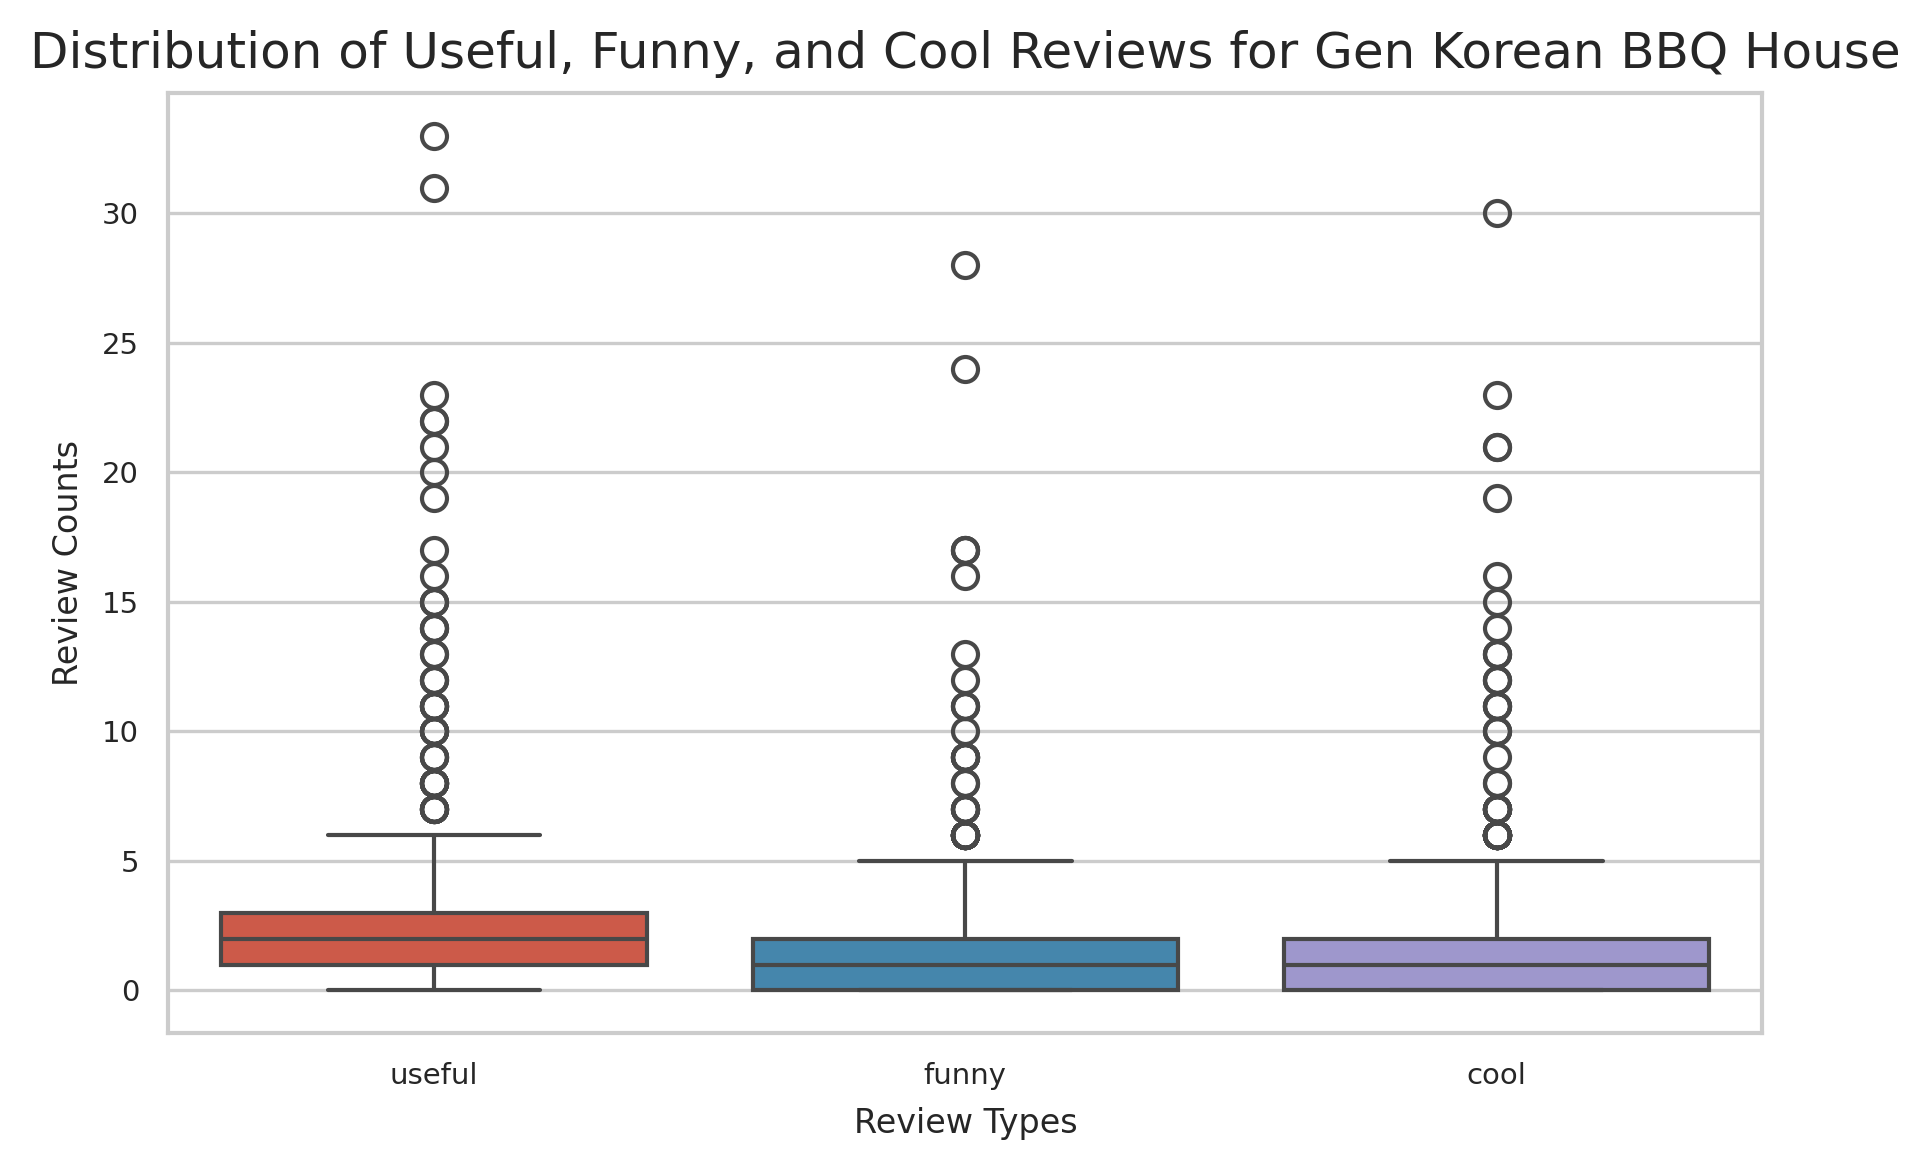

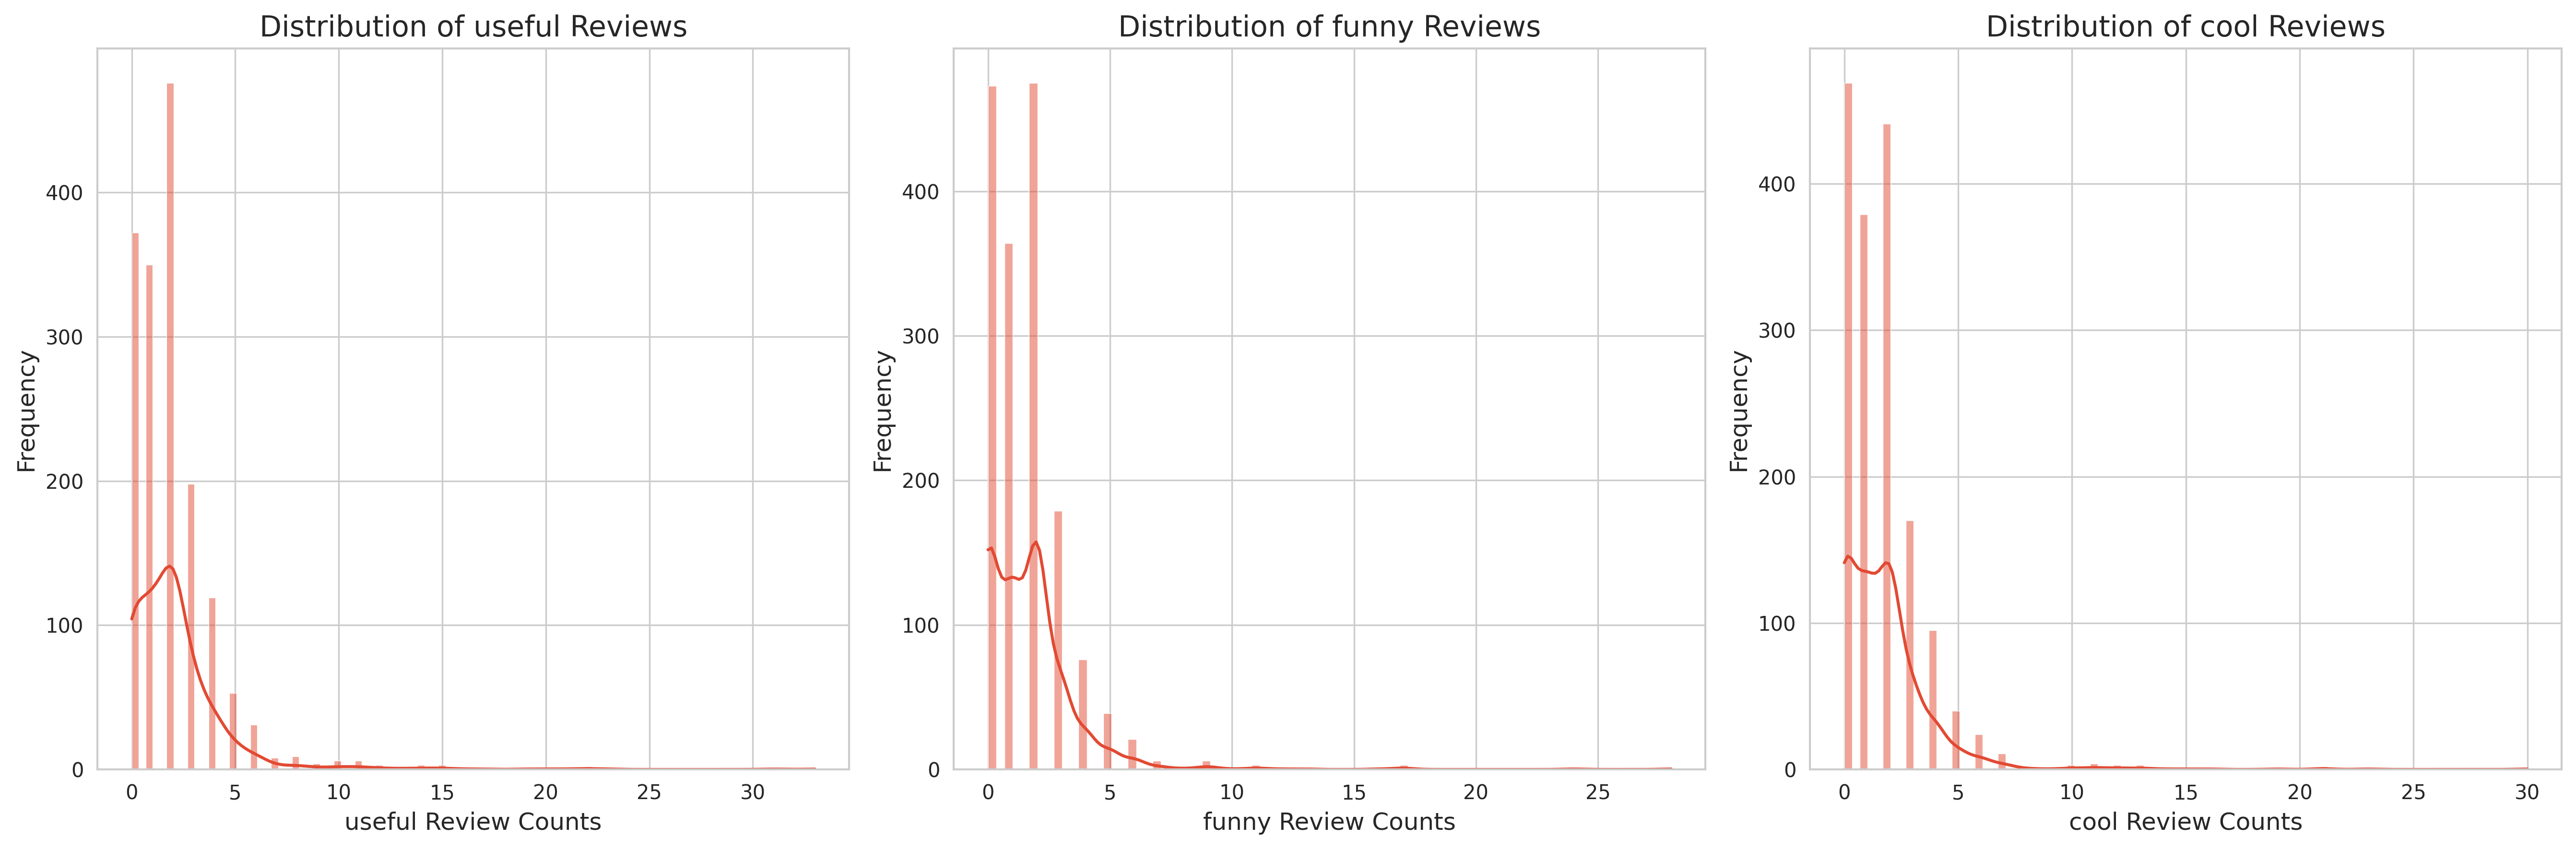

In [ ]:
# Filter reviews for the target business
selected_business = reviews[reviews['business_id'] == target_business_id]

# Extract 'useful', 'funny', and 'cool' columns
columns_to_plot = ['useful', 'funny', 'cool']
data_to_plot = selected_business[columns_to_plot]

# Plot a boxplot for the three review attributes
plt.figure(figsize=(6, 4))
ax = sns.boxplot(data=data_to_plot)
plt.title('Distribution of Useful, Funny, and Cool Reviews for Gen Korean BBQ House', fontsize=12)
plt.xlabel('Review Types', fontsize=8)
plt.ylabel('Review Counts', fontsize=8)
# Set font sizes for axis ticks
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.tight_layout()
plt.show()

# Plot histograms for each attribute
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, col in enumerate(columns_to_plot):
    sns.histplot(selected_business[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col} Reviews')
    axes[i].set_xlabel(f'{col} Review Counts')
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

### 3.3.2 Word Cloud- top 30 words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


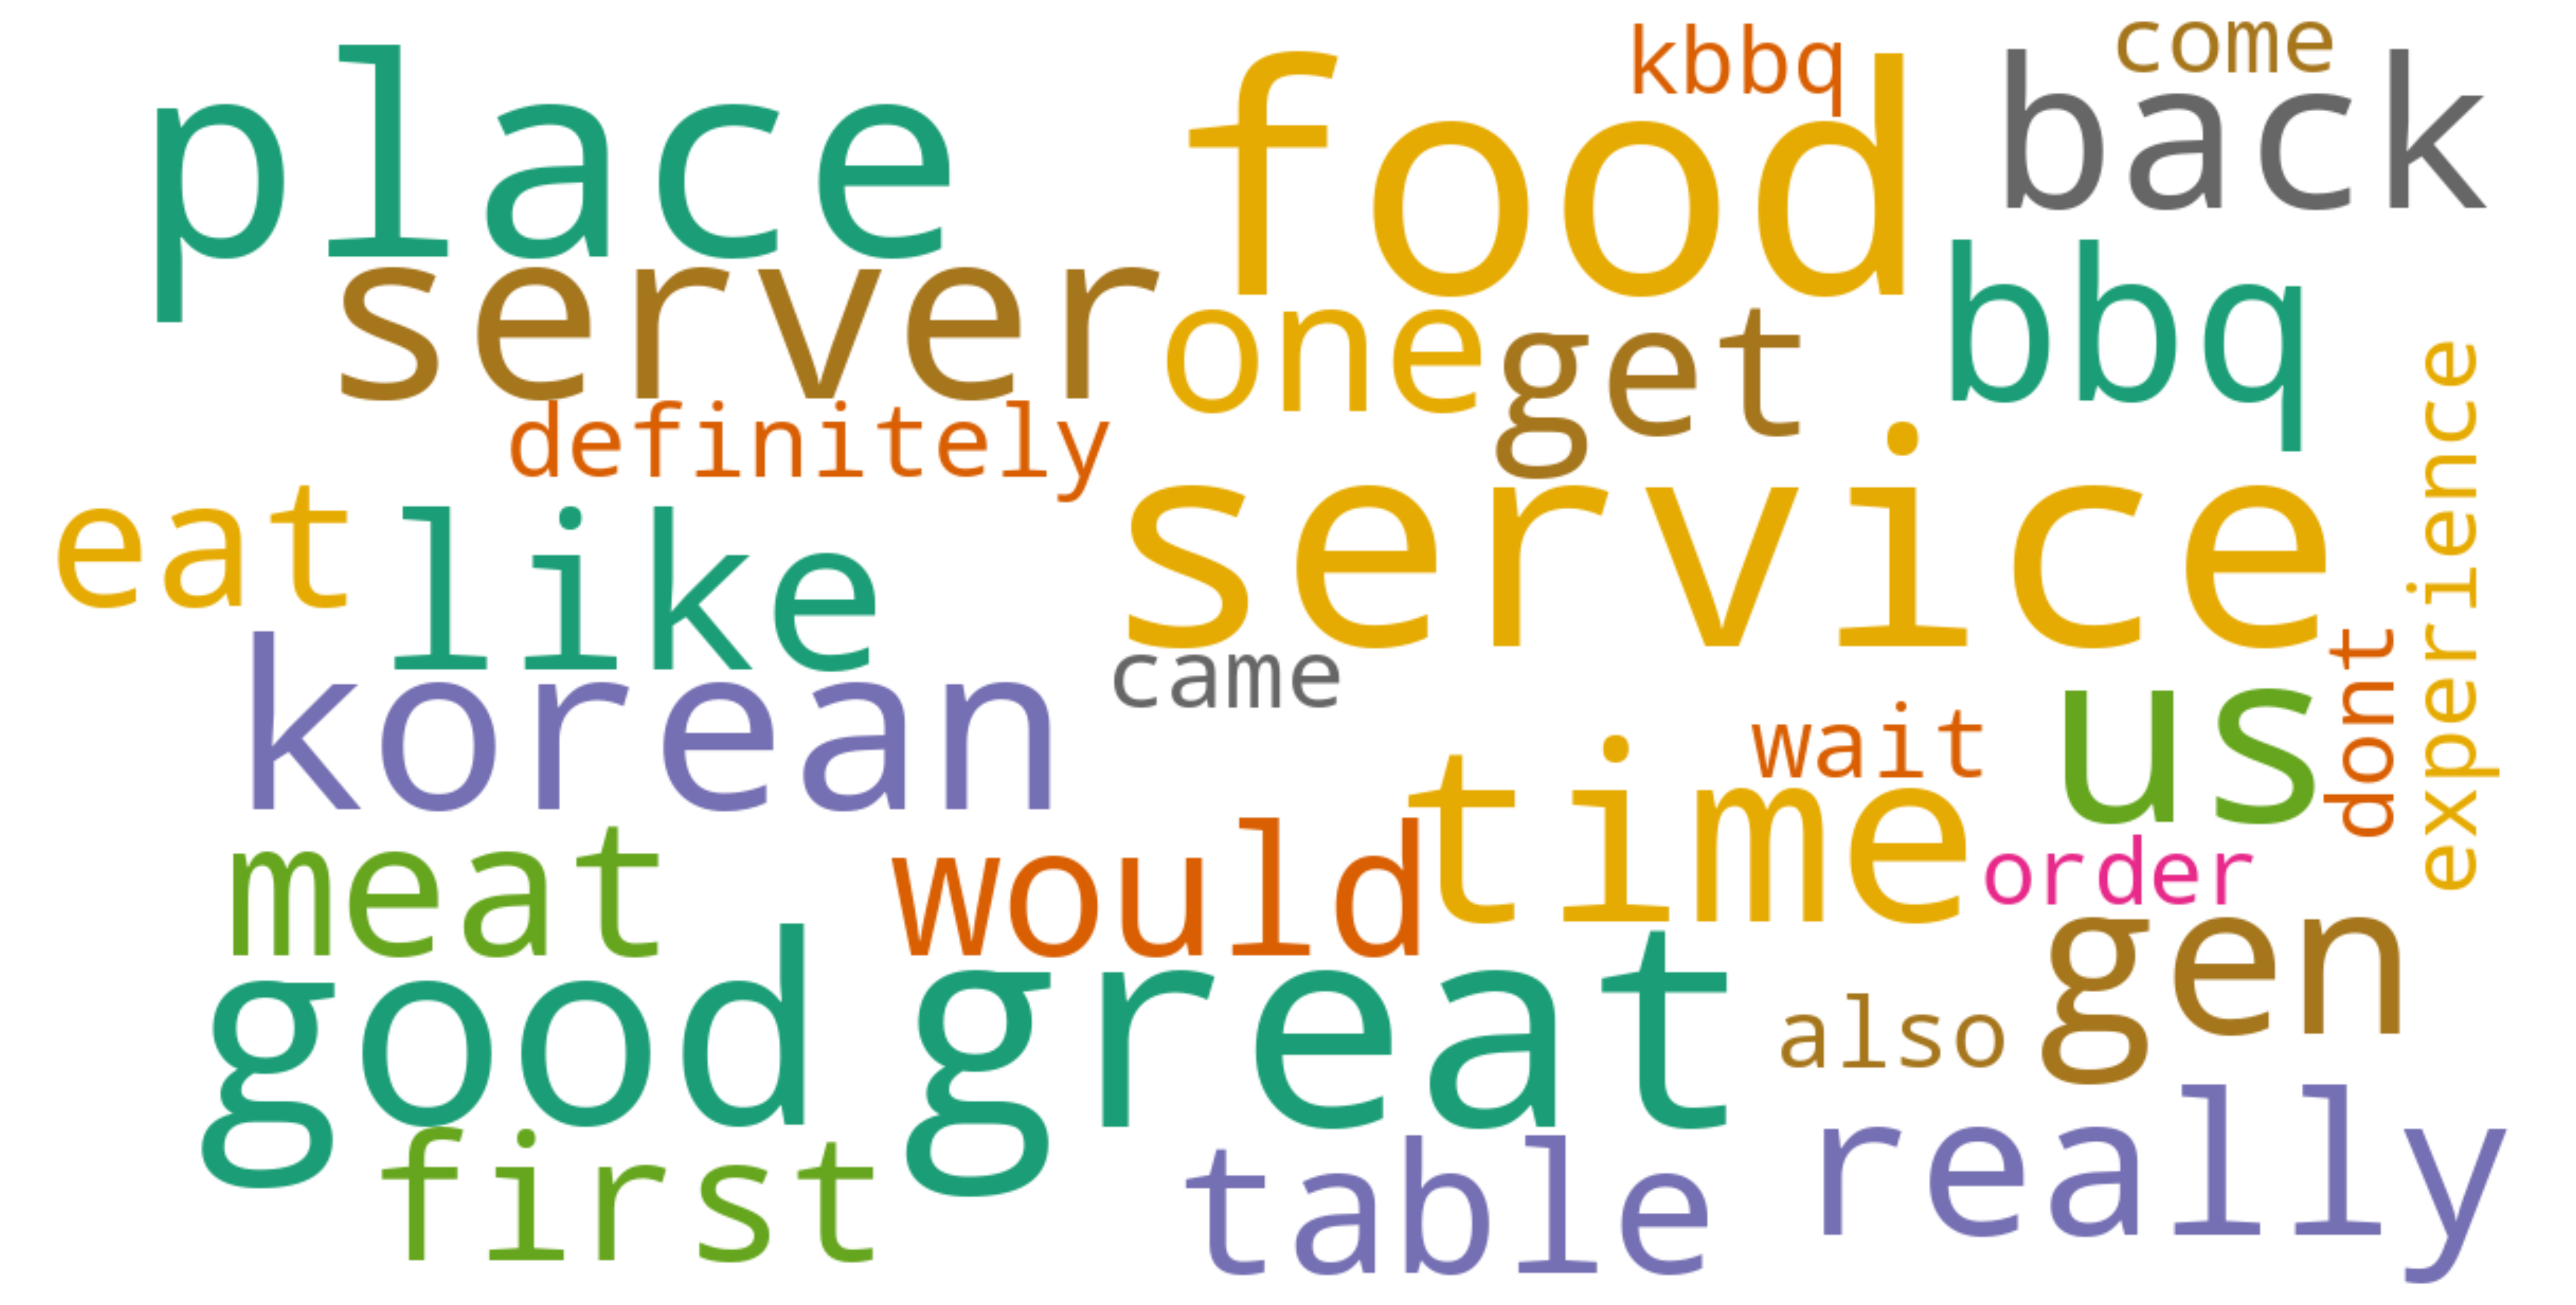

In [ ]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download English stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def createWordCloud(train, topk=30, max_words=50):
    # Split all review text into individual words
    words = train['text'].str.lower().str.split(expand=True).stack().reset_index(drop=True)

    # Remove non-alphabetic characters (punctuation, digits, etc.)
    words = words.str.replace(r'[^a-z]', '', regex=True)

    # Remove empty strings
    words = words[words != '']

    # Remove stopwords
    filtered_words = words[~words.isin(stop_words)]

    # Count word frequencies
    word_counts = filtered_words.value_counts().reset_index(name='n').rename(columns={'index': 'word'})

    # Select the top-k most frequent words
    topk_words = word_counts.head(topk)

    # Create a WordCloud object and generate from frequencies
    wordcloud = WordCloud(
        max_words=max_words,
        colormap='Dark2',
        width=1200,
        height=600,
        max_font_size=150,
        min_font_size=10,
        background_color='white',
        random_state=42,
        collocations=False  # Treat individual words only (not bigrams)
    ).generate_from_frequencies(dict(zip(topk_words['word'], topk_words['n'])))

    # Plot the word cloud
    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Filter reviews for a specific business ID
selected_reviews = reviews[reviews['business_id'] == target_business_id]

# Generate and display the word cloud
createWordCloud(selected_reviews)

### 3.3.3 VADER + AFINN Sentiment Contribution

**Methodology**:
1. VADER was used to label each sentence in the reviews as positive or negative.
2. We extracted **positive words** from positive reviews and **negative words** from negative reviews.
3. Sentiment contribution was calculated as:  
   **`Sentiment Contribution = Word Frequency × Sentiment Score (from AFINN)`**


In [ ]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

# Initialize stopwords, lemmatizer, and sentiment analyzer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
sia = SentimentIntensityAnalyzer()

# Load AFINN sentiment lexicon
afinn_url = "https://raw.githubusercontent.com/fnielsen/afinn/master/afinn/data/AFINN-111.txt"
afinn = pd.read_csv(afinn_url, sep='\t', header=None, names=['word', 'score'])

# Function to convert POS tags to WordNet-compatible format
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

# Main function to compute word-level sentiment contribution
def WordsContribution(reviews, target_business_id):
    # Filter reviews for the target business
    selected_reviews = reviews[reviews['business_id'] == target_business_id]

    # Initialize word containers
    pos_words = []
    neg_words = []

    # Process each review
    for text in selected_reviews['text']:
        score = sia.polarity_scores(text)['compound']
        words = re.findall(r'\b[a-z]+\b', text.lower())  # lowercase and clean
        tagged = pos_tag(words)

        for word, tag in tagged:
            wn_tag = get_wordnet_pos(tag)
            if wn_tag and word not in stop_words:
                lemma = lemmatizer.lemmatize(word, pos=wn_tag)
                if score >= 0.3:
                    pos_words.append(lemma)
                elif score <= -0.3:
                    neg_words.append(lemma)

    # Count word frequencies
    pos_df = pd.Series(pos_words).value_counts().reset_index(name='occurences').rename(columns={'index': 'word'})
    neg_df = pd.Series(neg_words).value_counts().reset_index(name='occurences').rename(columns={'index': 'word'})

    # Merge with AFINN scores and calculate contribution = score × frequency
    pos_contrib = pd.merge(pos_df, afinn, on='word', how='inner')
    pos_contrib['contribution'] = pos_contrib['score'] * pos_contrib['occurences']

    neg_contrib = pd.merge(neg_df, afinn, on='word', how='inner')
    neg_contrib['contribution'] = neg_contrib['score'] * neg_contrib['occurences']

    # Get top 20 positive and negative contribution words
    top_pos = pos_contrib[pos_contrib['contribution'] > 0].nlargest(20, 'contribution')
    top_neg = neg_contrib[neg_contrib['contribution'] < 0].nsmallest(20, 'contribution')
    top_all = pd.concat([top_pos, top_neg]).sort_values(by='contribution')

    # Bar plot of top words by contribution
    plt.figure(figsize=(10, 12))
    sns.barplot(
        x='contribution', y='word', data=top_all,
        hue=top_all['contribution'] > 0, dodge=False,
        palette={True: 'green', False: 'red'}
    )
    plt.legend(title='Positive Contribution', loc='upper right')
    plt.xlabel('Sentiment Contribution')
    plt.ylabel('Word')
    plt.title(f'Top 20 Positive and Negative Sentiment Words\nBusiness ID: {target_business_id}')
    plt.tight_layout()
    plt.show()

    # Word clouds for visual emphasis
    wc_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens')\
        .generate_from_frequencies(dict(zip(top_pos['word'], top_pos['contribution'])))

    wc_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds')\
        .generate_from_frequencies(dict(zip(top_neg['word'], -top_neg['contribution'])))

    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    axes[0].imshow(wc_neg, interpolation='bilinear')
    axes[0].set_title('Negative Sentiment Words', fontsize=16, color='red')
    axes[0].axis('off')

    axes[1].imshow(wc_pos, interpolation='bilinear')
    axes[1].set_title('Positive Sentiment Words', fontsize=16, color='green')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Call the function
WordsContribution(reviews, target_business_id)

Output hidden; open in https://colab.research.google.com to view.

### 3.3.4 Score Sentiment for reviews using VADER

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Download VADER sentiment lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

def calculate_vader_sentiment(text):
    """
    Analyze a single piece of text using VADER and return the compound sentiment score.
    """
    return sia.polarity_scores(text)['compound']

def get_top_n_vader_reviews(reviews, target_business_id, topk=10):
    """
    Return the top N most positive and negative reviews based on VADER sentiment scores.

    Parameters:
    - reviews: DataFrame containing at least 'business_id' and 'text' columns
    - target_business_id: string, ID of the business to analyze
    - topk: int, number of reviews to return for each polarity

    Returns:
    - top_positive: DataFrame of the top N most positive reviews
    - top_negative: DataFrame of the top N most negative reviews
    """
    # Filter reviews for the target business
    selected_reviews = reviews[reviews['business_id'] == target_business_id].copy()

    # Calculate sentiment score for each review
    selected_reviews['vader_score'] = selected_reviews['text'].apply(calculate_vader_sentiment)

    # Get top N most positive reviews (highest scores)
    top_positive = selected_reviews.sort_values(by='vader_score', ascending=False).head(topk)

    # Get top N most negative reviews (lowest scores)
    top_negative = selected_reviews.sort_values(by='vader_score', ascending=True).head(topk)

    return top_positive, top_negative

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Call the function to get top 10 sentiment-polarized reviews
top_pos, top_neg = get_top_n_vader_reviews(reviews, target_business_id)

# Reset the display option to default if it was previously modified
pd.reset_option('display.max_colwidth')

# Print top positive reviews
print("Top Positive Reviews:")
print(top_pos[['text', 'vader_score']].to_string(max_colwidth=100))

# Print top negative reviews
print("\nTop Negative Reviews:")
print(top_neg[['text', 'vader_score']].to_string(max_colwidth=100))


Top Positive Reviews:
                                                                                                        text  vader_score
203303   Gen from outside the entrance looks like a really quiet restaurant. Yet as soon as you emerge th...       0.9993
2886843  I came here after I seen that person below me who's gonna bring out the "fat girl in her" posted...       0.9993
4621175  Disclaimer: I eat AYCE A LOT. Like once a week a lot. Like sometimes twice a week a lot. \n\nGen...       0.9993
1342861  I've waited a long time for a restaurant opening near Galleria \/ Sunset Station that I can real...       0.9992
163359   Whatever you do- DO NOT PUT YOUR JAP CHAE GLASS NOODLES AND VEGGIES ON THE GRILL! My friends and...       0.9991
5176272  Our friend has been raving about this place since they came to town.  He came from LA and has ea...       0.9990
625787   There was a time I had given up on the KBBQ in Vegas. The quality was either terrible (Tofu Hut)...       0.9989
44

### 3.3.5 Bigram Co-occurrence Network

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


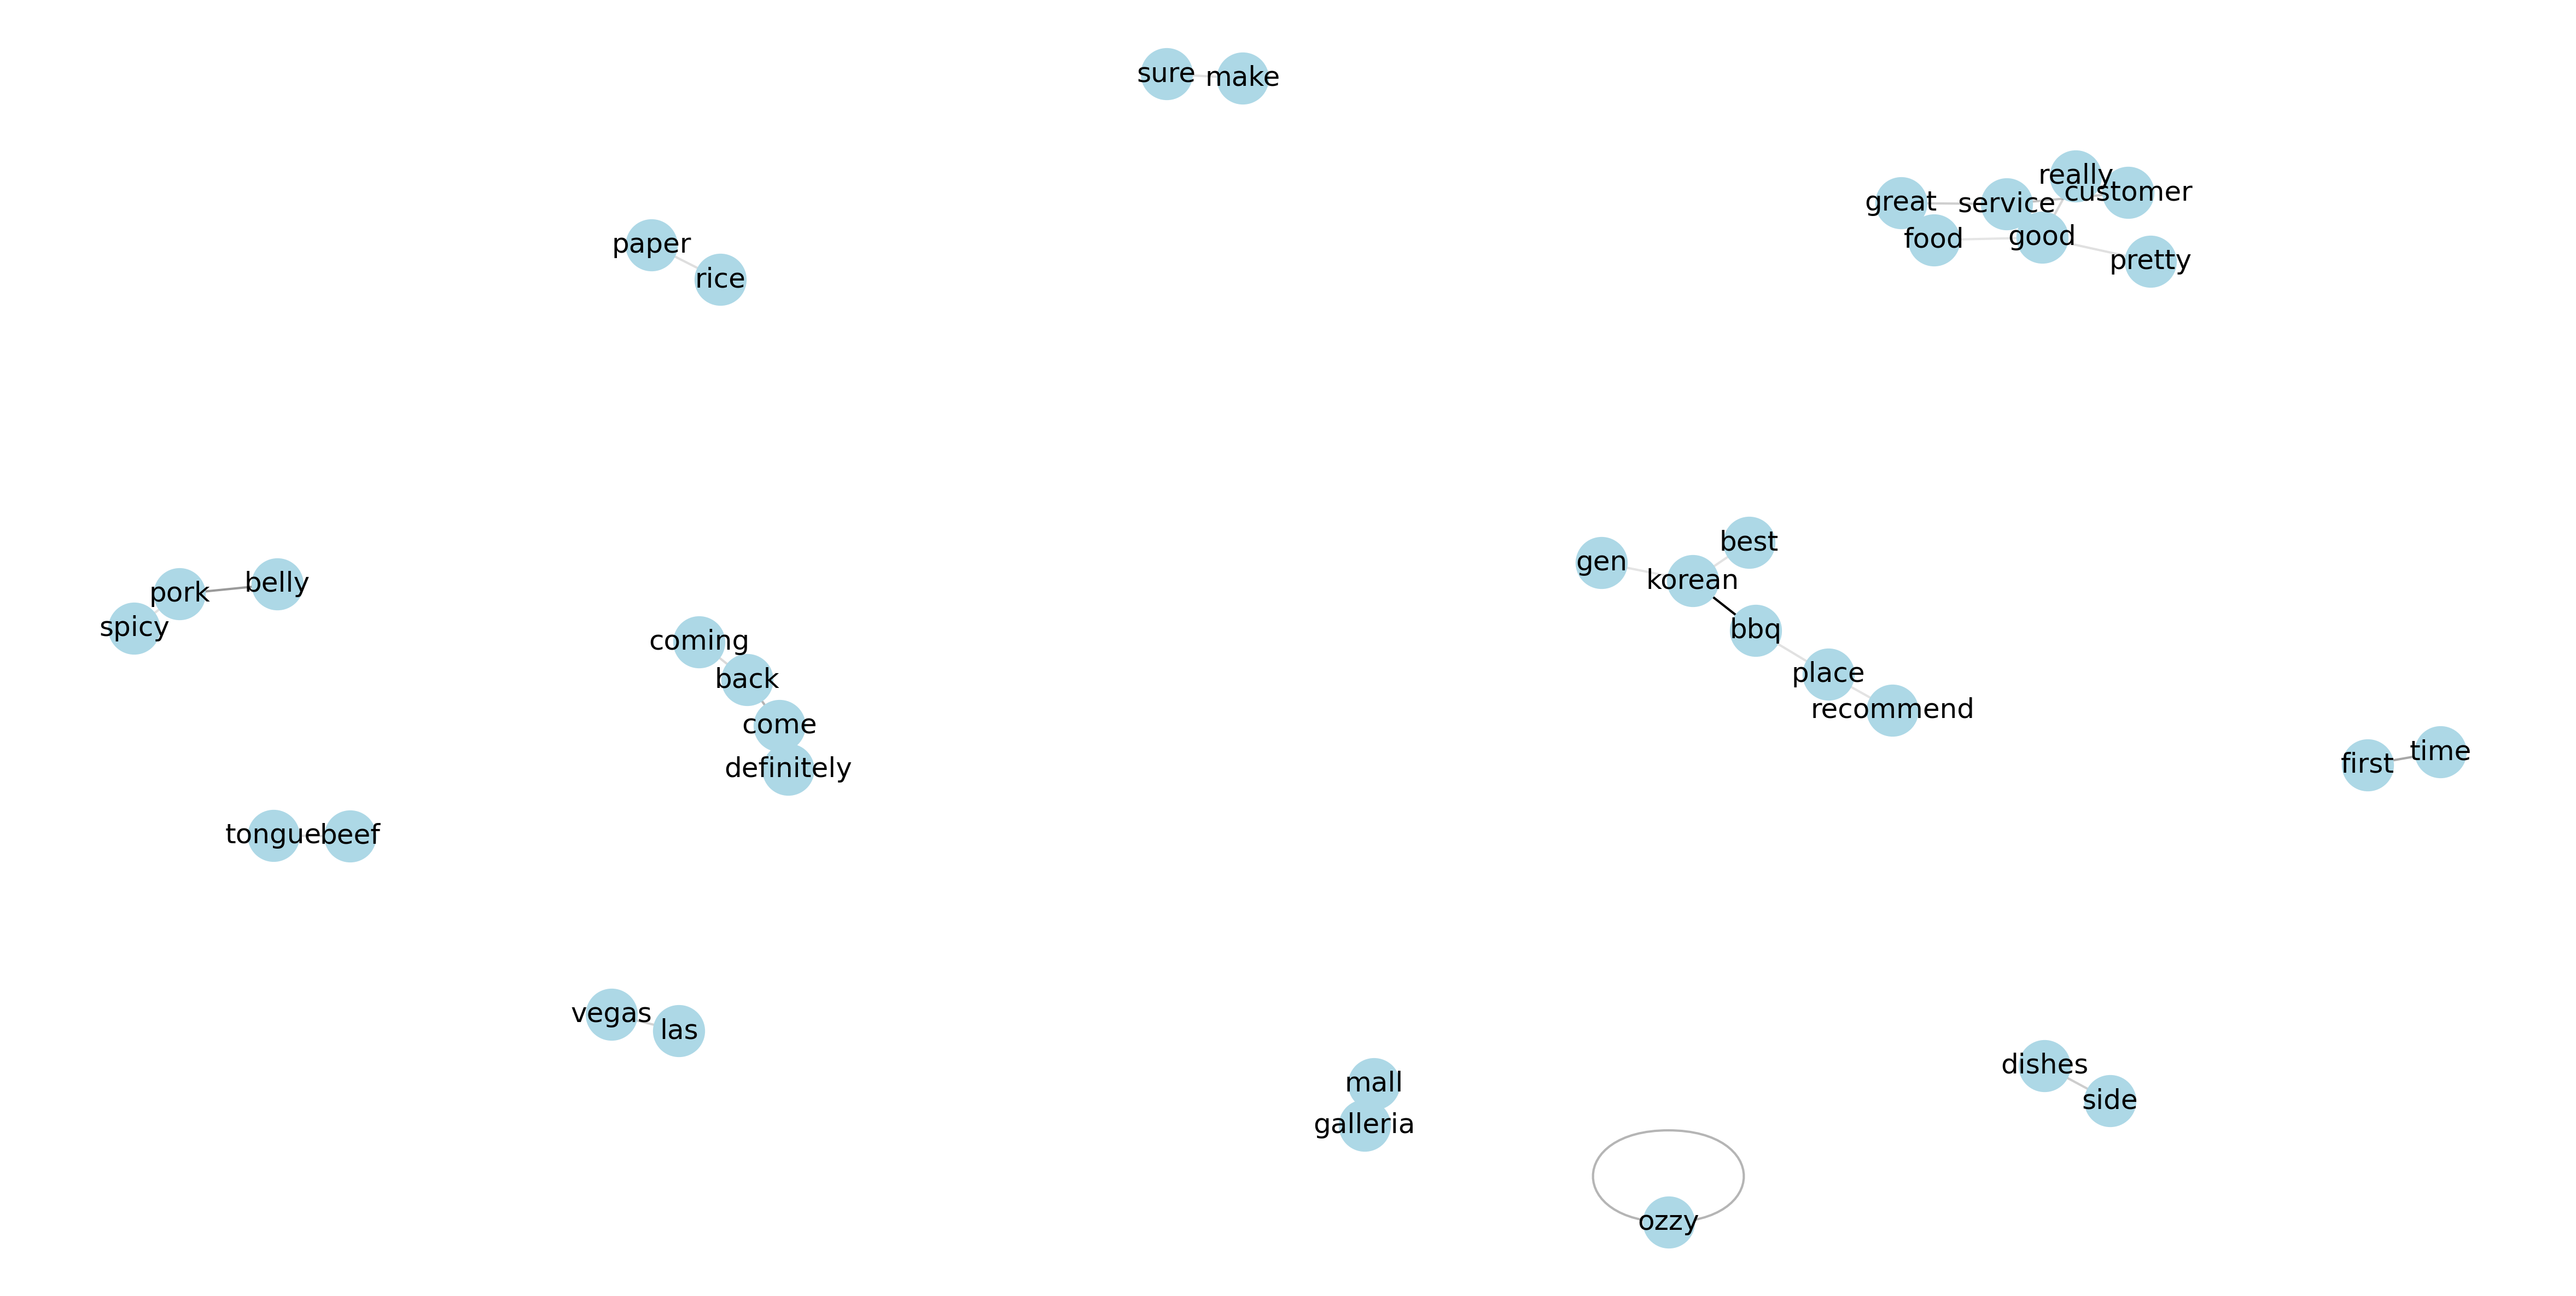

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import networkx as nx
import re
import matplotlib.pyplot as plt
import pandas as pd
import nltk

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load English stopwords
stop_words = set(stopwords.words('english'))

def count_bigrams(dataset):
    """
    Count the frequency of word bigrams in a dataset, filtering out stopwords and non-alphabetic tokens.

    :param dataset: DataFrame containing a 'text' column with review text
    :return: DataFrame of bigram frequencies with separate columns for each word
    """
    all_bigrams = []
    for text in dataset['text']:
        # Tokenize and convert to lowercase
        tokens = word_tokenize(text.lower())
        # Keep only alphabetic words that are not stopwords
        filtered_tokens = [word for word in tokens if re.match(r'^[a-z]+$', word) and word not in stop_words]
        # Generate bigrams
        current_bigrams = list(nltk.bigrams(filtered_tokens))
        all_bigrams.extend(current_bigrams)

    # Count bigram frequencies
    bigram_count = pd.Series(all_bigrams).value_counts().reset_index(name='n')
    bigram_count.columns = ['bigram', 'n']
    bigram_count[['word1', 'word2']] = pd.DataFrame(bigram_count['bigram'].tolist())
    bigram_count = bigram_count.sort_values(by='n', ascending=False)
    return bigram_count

def visualize_bigrams(bigrams):
    """
    Visualize bigrams as a network graph.

    :param bigrams: DataFrame with 'word1', 'word2', and 'n' columns representing bigram frequency
    """
    # Create a graph from the bigrams
    G = nx.from_pandas_edgelist(bigrams, 'word1', 'word2', edge_attr='n')

    # Compute layout for the graph
    pos = nx.spring_layout(G, k=0.5, seed=42)

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)

    # Draw edges with transparency based on weight
    max_weight = bigrams['n'].max()
    for u, v, data in G.edges(data=True):
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], alpha=data['n'] / max_weight)

    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=10)

    # Remove axes and show plot
    plt.axis('off')
    plt.title("Bigram Network", fontsize=14)
    plt.show()

# Filter reviews for the target business ID and compute bigrams
bigramsMonAmiGabi = count_bigrams(reviews[reviews['business_id'] == target_business_id])

# Keep only bigrams with more than 50 occurrences
bigrams_filtered = bigramsMonAmiGabi[bigramsMonAmiGabi['n'] > 50]

# Visualize the bigrams as a network graph
visualize_bigrams(bigrams_filtered)

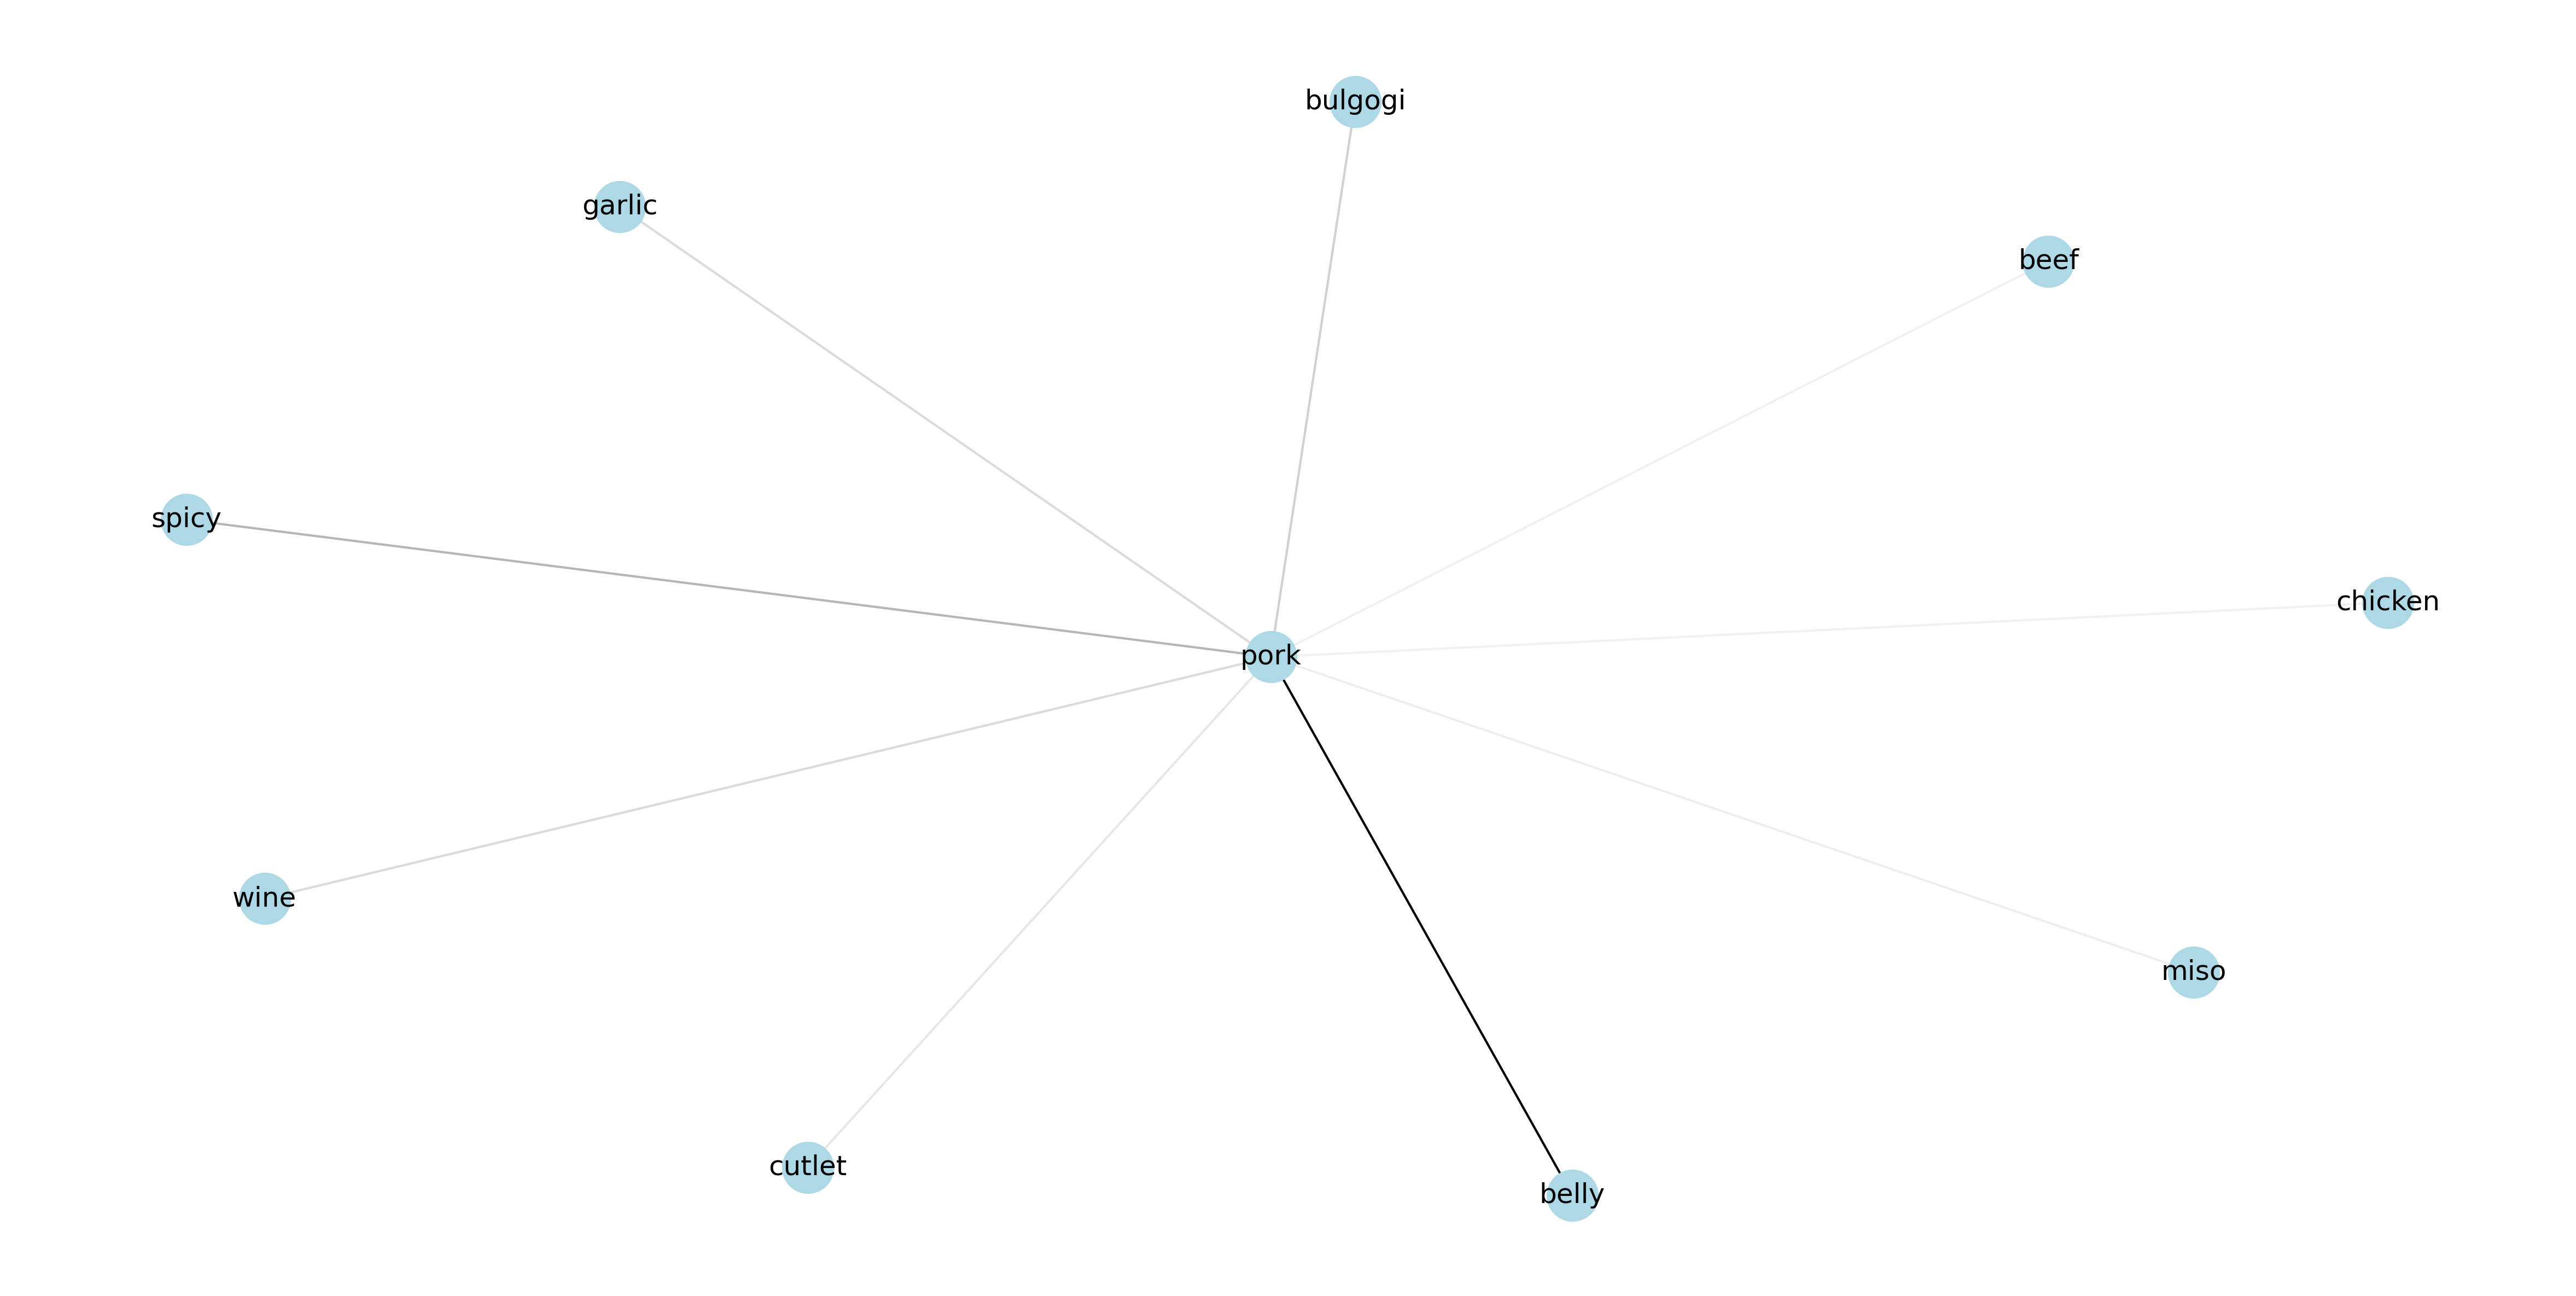

In [ ]:
# Filter bigrams where either word is "pork" and the count is greater than 10
bigrams_filtered = bigramsMonAmiGabi[
    ((bigramsMonAmiGabi['word1'] == "pork") | (bigramsMonAmiGabi['word2'] == "pork")) &
    (bigramsMonAmiGabi['n'] > 10)
]

# Visualize the filtered bigram network
visualize_bigrams(bigrams_filtered)

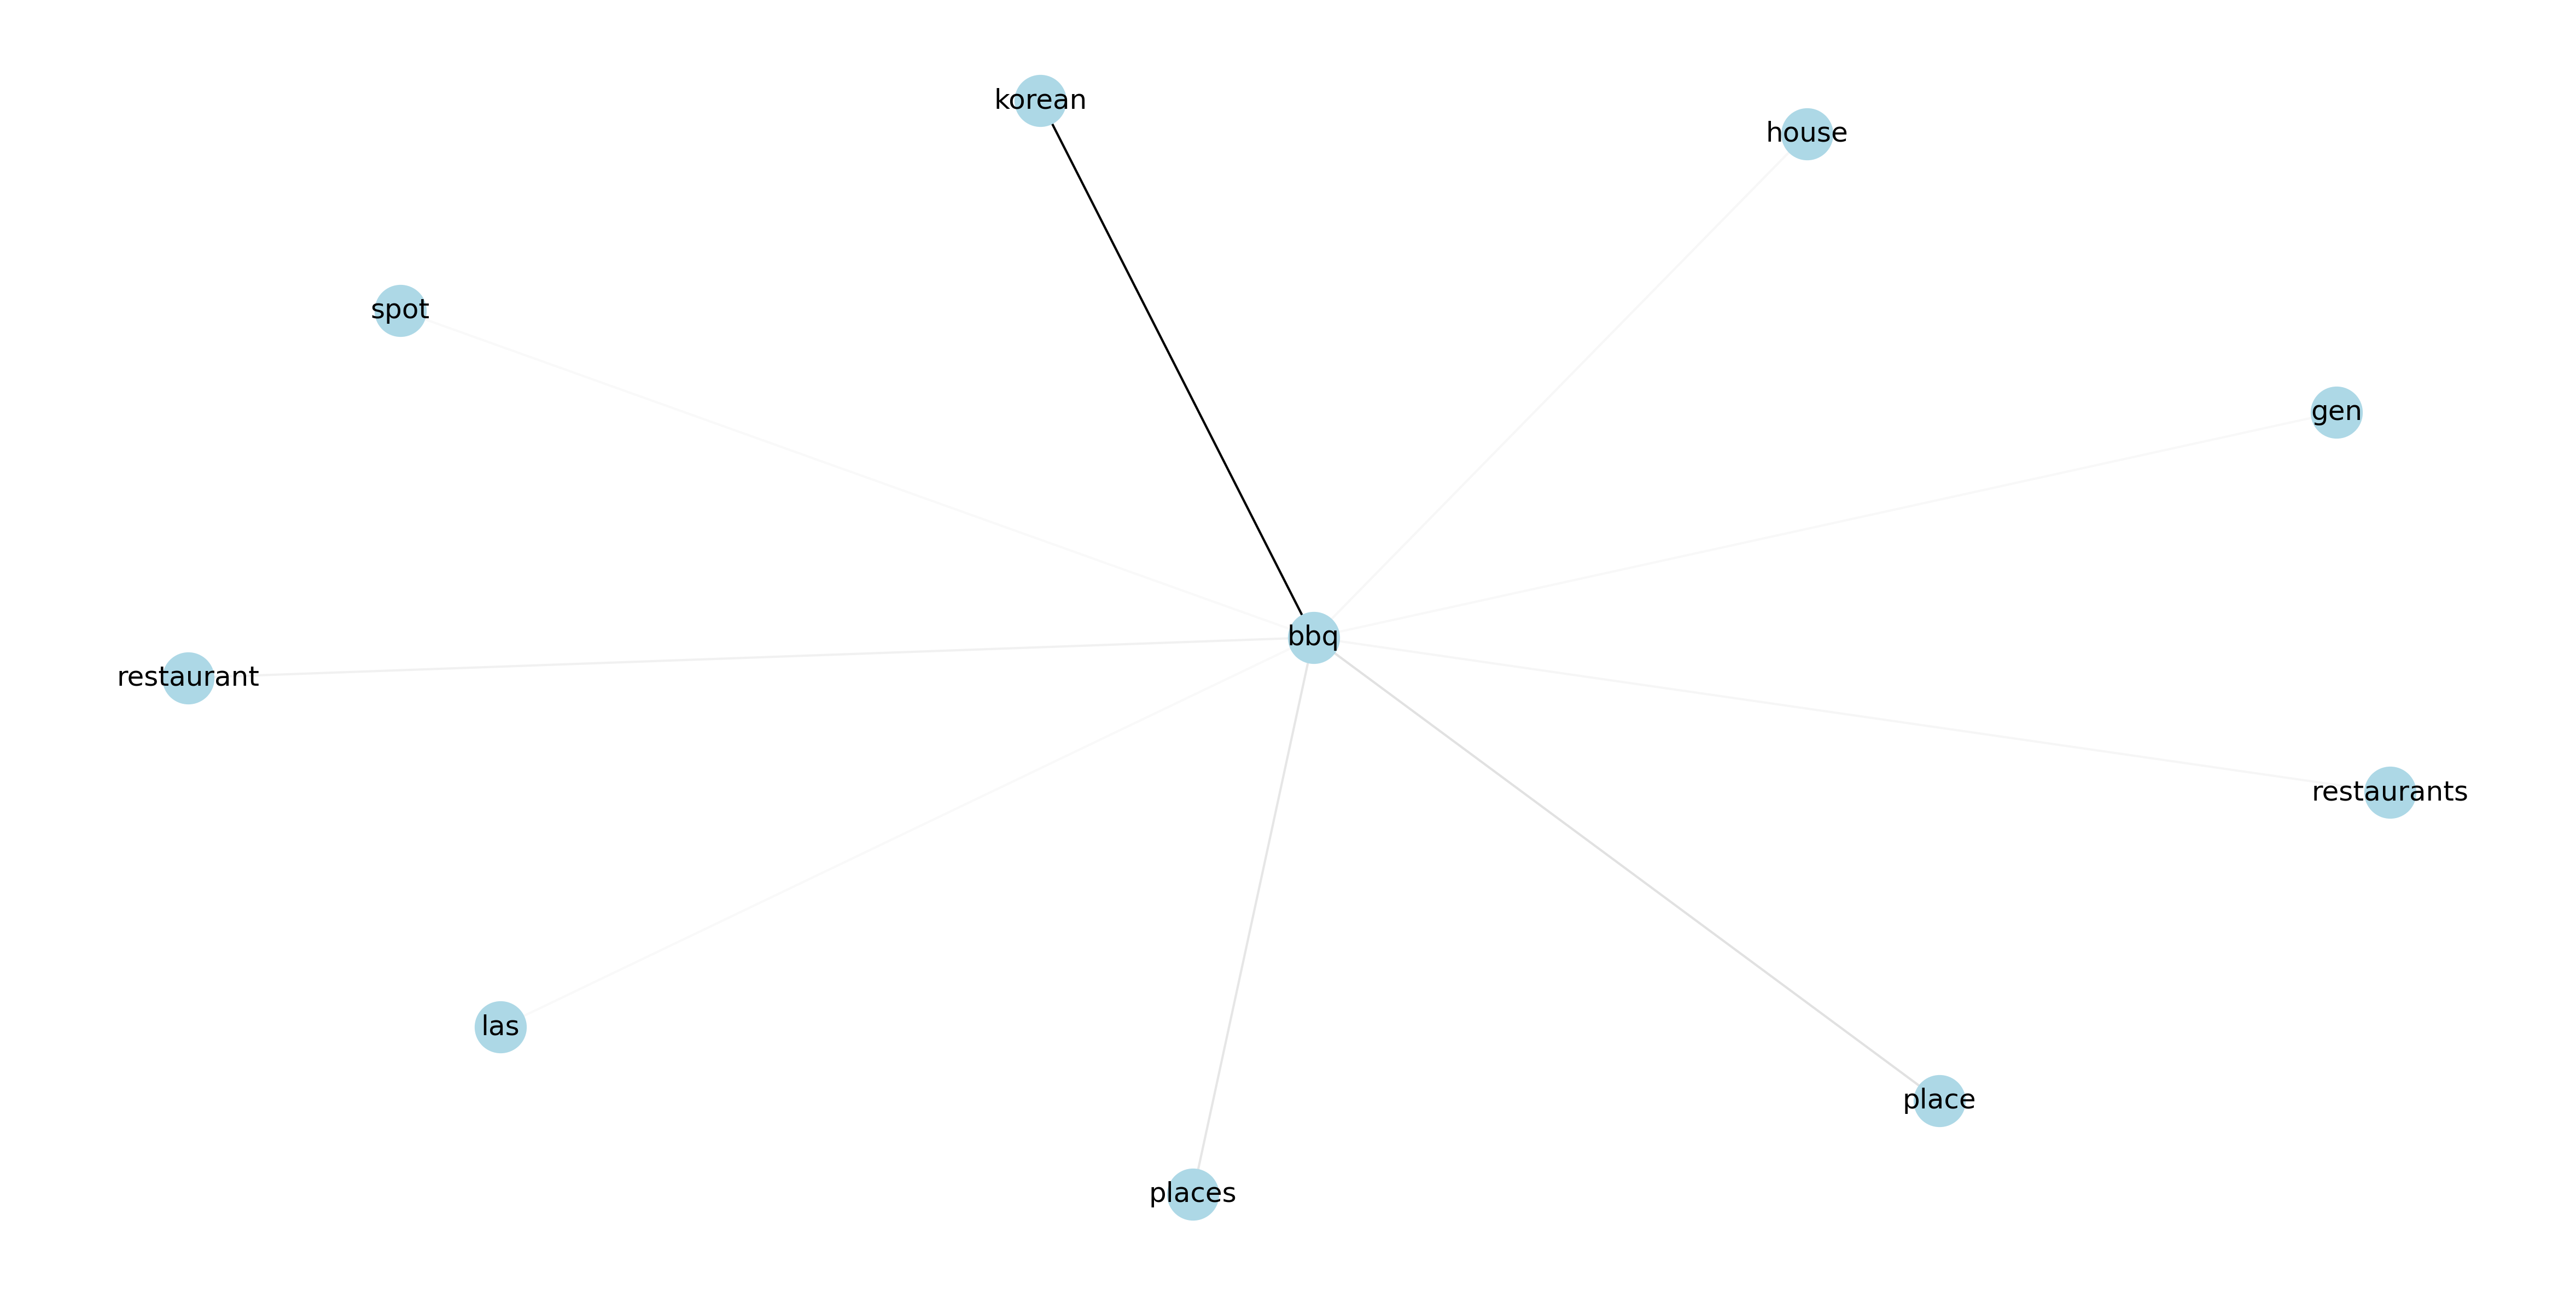

In [ ]:
# Filter bigrams where either word is "bbq" and the count is greater than 10
bigrams_filtered = bigramsMonAmiGabi[((bigramsMonAmiGabi['word1'] == "food") | (bigramsMonAmiGabi['word2'] == "food")) & (bigramsMonAmiGabi['n'] > 10)]

# Visualize the filtered bigram network
visualize_bigrams(bigrams_filtered)

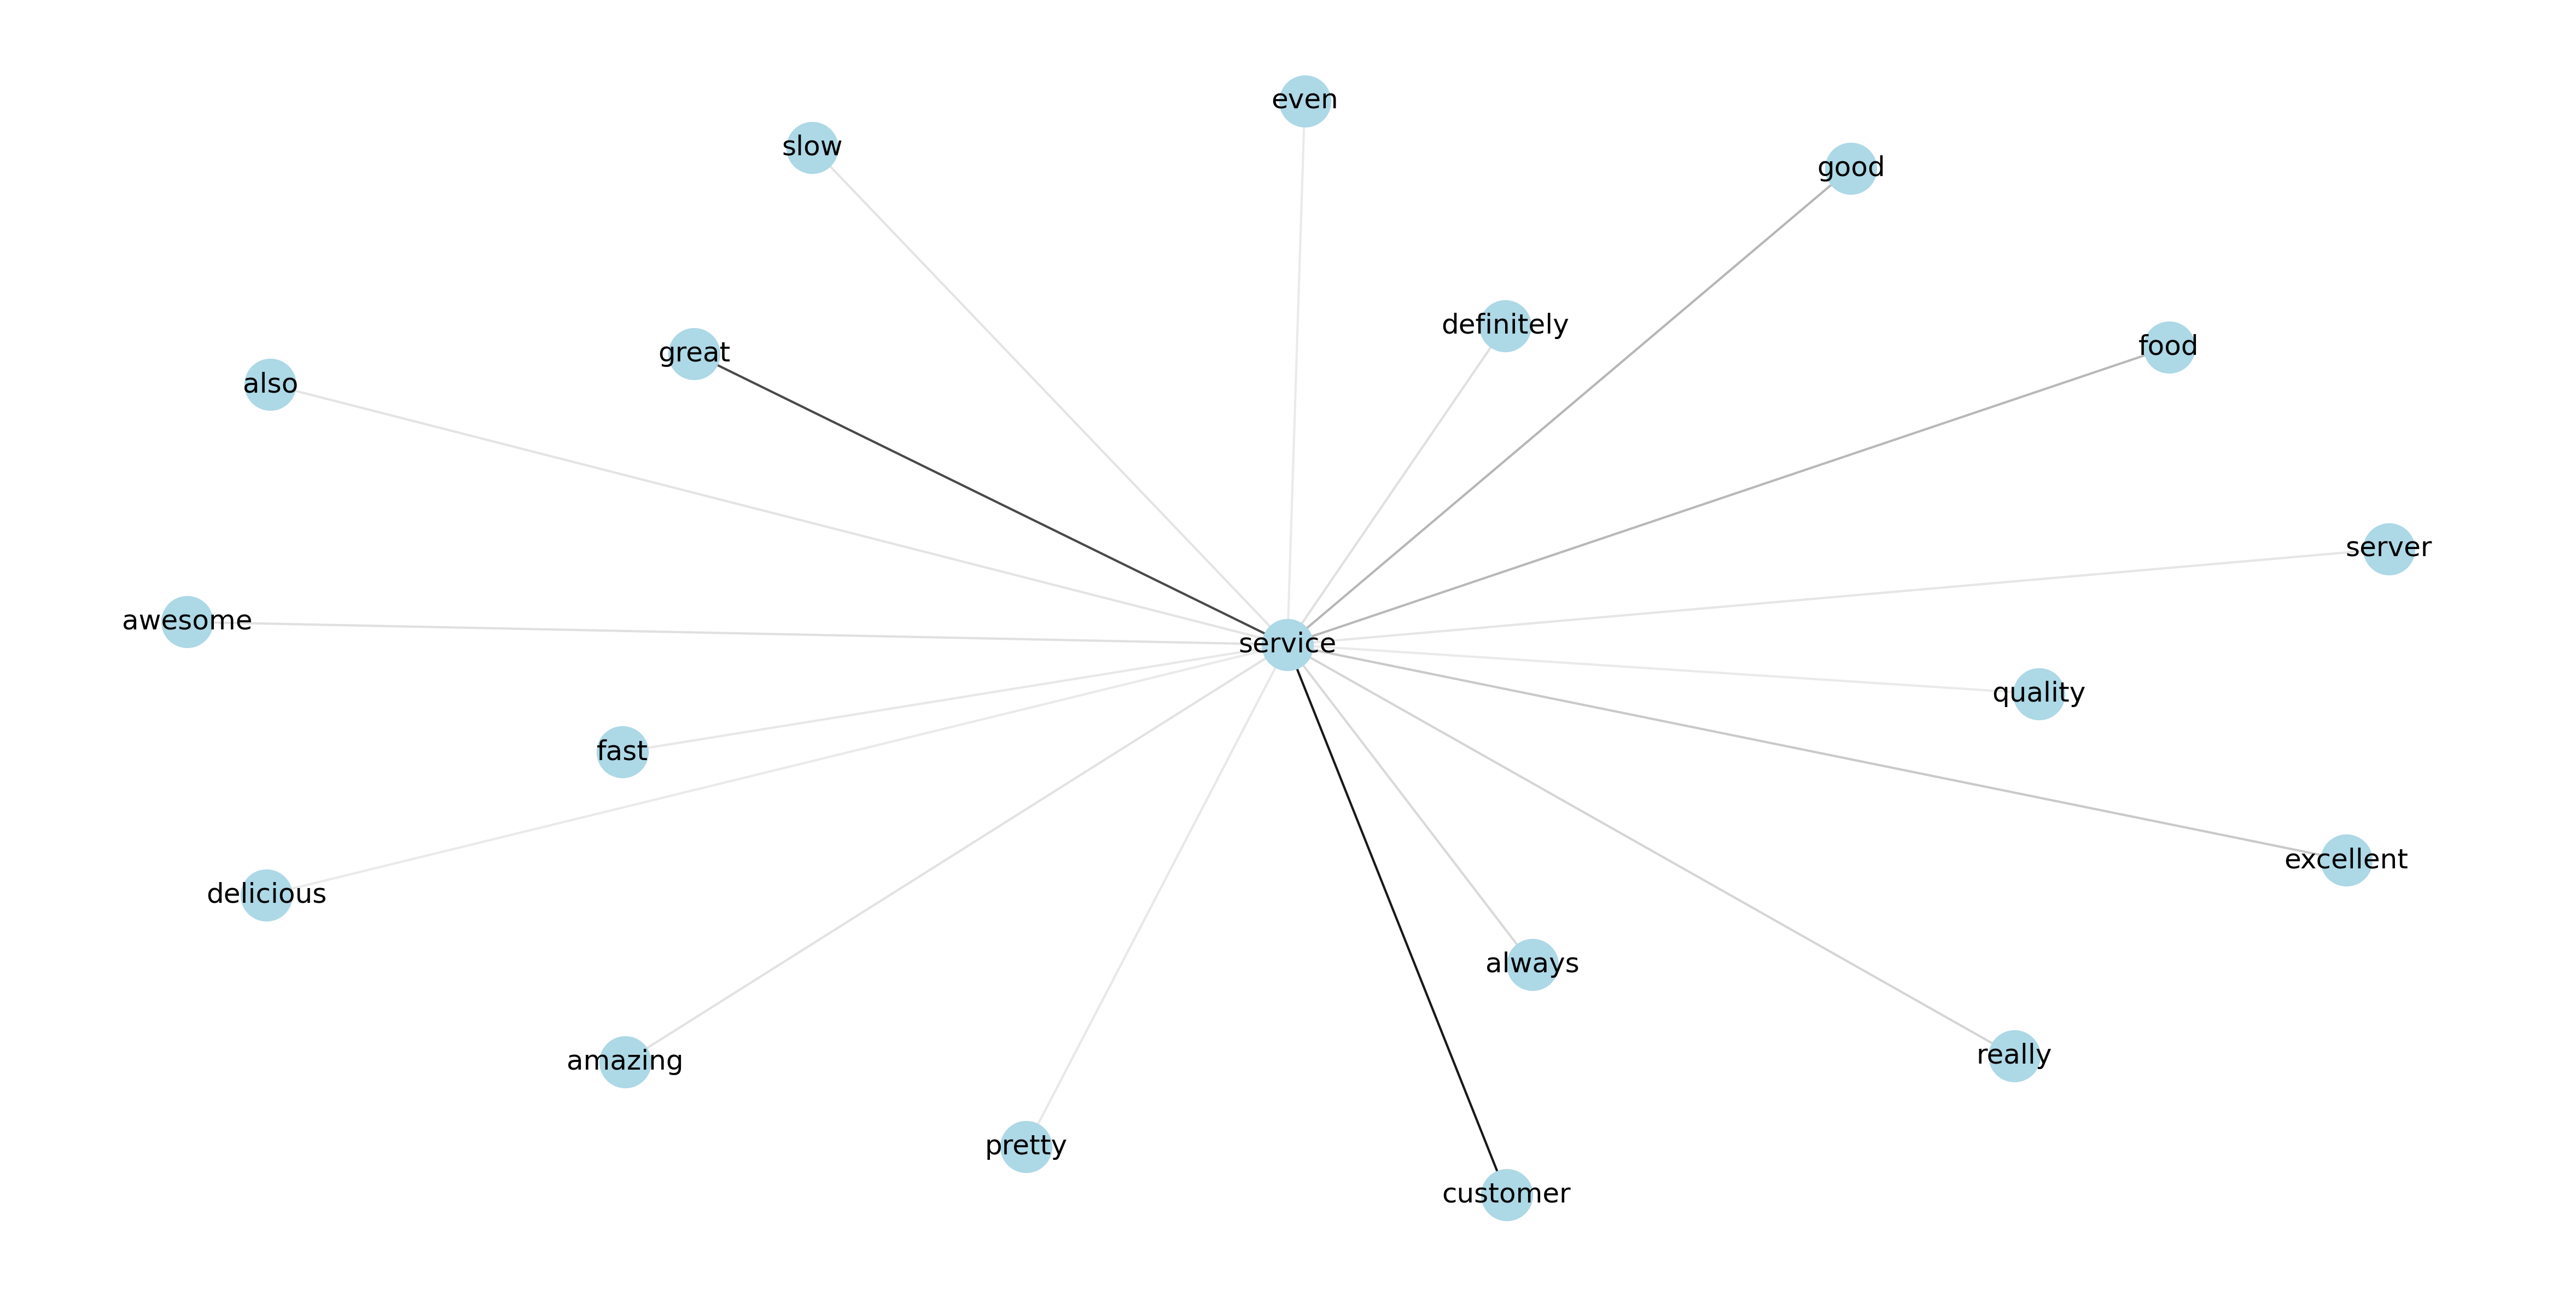

In [ ]:
# Filter bigrams where either word is "service" and the count is greater than 10
bigrams_filtered = bigramsMonAmiGabi[((bigramsMonAmiGabi['word1'] == "service") | (bigramsMonAmiGabi['word2'] == "service")) & (bigramsMonAmiGabi['n'] > 10)]

# Visualize the filtered bigram network
visualize_bigrams(bigrams_filtered)

# 4.Social Network Analysis

This section explores the user interaction network in Stuttgart, constructed from Yelp review data. **We model the social graph, analyze its structure, and perform community detection using the Louvain algorithm**. After removing disconnected users, the analysis focuses on a **core active network** of engaged users.

## 4.1 Network Structure Analysis

In [ ]:
# Extract user data from businesses located in the city of Stuttgart and create a user network graph

# Select businesses located in Stuttgart
subset = business[business.city == 'Stuttgart']

# Perform an inner join between business and reviews to get reviews for those businesses
subset = pd.merge(subset, reviews, how='inner', on='business_id')

# Extract unique user IDs from the reviews
subset_users = subset.user_id.unique()

# Create a DataFrame of user IDs
subset_users = pd.DataFrame(subset_users, columns=['user_id'])

# Join with the user dataset to get additional user information
subset_users = pd.merge(subset_users, user, how='inner', on='user_id')

# Create a list of friends for each user (split the string into a list)
subset_users['list_friends'] = subset_users["friends"].apply(lambda x: str(x).split(',') if isinstance(x, str) else [])

# Count the number of friends for each user
subset_users['count_friends'] = subset_users["list_friends"].apply(lambda x: len(x))

In [ ]:
# Extract user IDs and their friends list
subset_users_list = subset_users[['user_id', 'list_friends']]

# Expand the friends list so each friend becomes a separate row
network_data = subset_users_list.set_index(['user_id'])['list_friends'].apply(pd.Series).stack()

# Reset the index to flatten the DataFrame
network_data = network_data.reset_index()

# Rename the columns for clarity: source = user, target = friend
network_data.columns = ['source', 'level_1', 'target']

In [ ]:
import networkx as nx
import heapq
import matplotlib.pyplot as plt

# Create the network graph from the edge list
graph = nx.from_pandas_edgelist(network_data, source='source', target='target')

print(f"Original Graph Info: Number of nodes = {graph.number_of_nodes()}, Number of edges = {graph.number_of_edges()}")

# Calculate degree centrality
degree_centrality = nx.degree_centrality(graph)

# Select the top 500 most influential nodes by degree centrality
influencers = heapq.nlargest(500, degree_centrality, key=degree_centrality.get)

print(f"Found {len(influencers)} influencers")

# Create a subgraph containing only the top influencers
influencers_sub_graph = graph.subgraph(influencers).copy()

# Remove isolated nodes (nodes with no edges in the subgraph)
isolated_nodes = list(nx.isolates(influencers_sub_graph))
print(f"Found {len(isolated_nodes)} isolated nodes")

if isolated_nodes:
    influencers_sub_graph.remove_nodes_from(isolated_nodes)
    print(f"After removing isolates: Nodes = {influencers_sub_graph.number_of_nodes()}, Edges = {influencers_sub_graph.number_of_edges()}")

# Print basic info
print("\nFinal Subgraph Info:")
print(f"Nodes: {influencers_sub_graph.number_of_nodes()}")
print(f"Edges: {influencers_sub_graph.number_of_edges()}")
print(f"Graph density: {nx.density(influencers_sub_graph):.4f}")

# Visualization setup
plt.figure(figsize=(12, 8))

# Use spring layout with more iterations for better positioning
pos = nx.spring_layout(influencers_sub_graph, k=1, iterations=50)

# Scale node size by degree centrality
node_sizes = [degree_centrality.get(node, 0) * 3000 for node in influencers_sub_graph.nodes()]

# Draw the network graph
nx.draw(influencers_sub_graph,
        pos=pos,
        node_size=node_sizes,
        node_color='lightblue',
        edge_color='gray',
        alpha=0.7,
        with_labels=False)  # Do not show labels for clarity

plt.title("Top 500 Influencers Network (excluding isolates)")
plt.axis('off')
plt.tight_layout()
plt.show()

# Extra network statistics
print("\nNetwork Statistics:")
print(f"Number of nodes: {influencers_sub_graph.number_of_nodes()}")
print(f"Number of edges: {influencers_sub_graph.number_of_edges()}")
print(f"Average degree: {sum(dict(influencers_sub_graph.degree()).values()) / influencers_sub_graph.number_of_nodes():.2f}")

# Display top 10 nodes with the highest degree
top_nodes = sorted(influencers_sub_graph.degree(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 Nodes by Degree:")
for node, degree in top_nodes:
    print(f"  {node}: {degree} connections")

Output hidden; open in https://colab.research.google.com to view.

## 4.2 Louvain Community Detection

In [ ]:
pip install python-louvain

In [ ]:
import networkx as nx
import heapq
import matplotlib.pyplot as plt

# Create the graph from the edge list
graph = nx.from_pandas_edgelist(network_data, source='source', target='target')

print(f"Original graph info: Number of nodes = {graph.number_of_nodes()}, Number of edges = {graph.number_of_edges()}")

# Calculate degree centrality
degree_centrality = nx.degree_centrality(graph)

# Identify the top 500 most influential nodes by degree centrality
influencers = heapq.nlargest(500, degree_centrality, key=degree_centrality.get)

print(f"Found {len(influencers)} influencers")

# Create a subgraph of only the top influencers
influencers_subgraph = graph.subgraph(influencers).copy()

# Identify and remove isolated nodes (nodes with no connections)
isolated_nodes = list(nx.isolates(influencers_subgraph))
print(f"Found {len(isolated_nodes)} isolated nodes")

if isolated_nodes:
    influencers_subgraph.remove_nodes_from(isolated_nodes)
    print(f"After removing isolates: Nodes = {influencers_subgraph.number_of_nodes()}, Edges = {influencers_subgraph.number_of_edges()}")

# Summary of the final subgraph
print("\nFinal subgraph info:")
print(f"Number of nodes: {influencers_subgraph.number_of_nodes()}")
print(f"Number of edges: {influencers_subgraph.number_of_edges()}")
print(f"Graph density: {nx.density(influencers_subgraph):.4f}")

# Plotting the network
plt.figure(figsize=(12, 8))

# Use spring layout for better visualization (with more iterations)
pos = nx.spring_layout(influencers_subgraph, k=1, iterations=50)

# Node sizes based on degree centrality
node_sizes = [degree_centrality.get(node, 0) * 3000 for node in influencers_subgraph.nodes()]

# Draw the network graph
nx.draw(
    influencers_subgraph,
    pos=pos,
    node_size=node_sizes,
    node_color='lightblue',
    edge_color='gray',
    alpha=0.7,
    with_labels=False  # Hide labels for better visual clarity
)

plt.title("Top 500 Influencers Network (excluding isolated nodes)")
plt.axis('off')
plt.tight_layout()
plt.show()

# Extra stats
print("\nNetwork statistics:")
print(f"Number of nodes: {influencers_subgraph.number_of_nodes()}")
print(f"Number of edges: {influencers_subgraph.number_of_edges()}")
avg_degree = sum(dict(influencers_subgraph.degree()).values()) / influencers_subgraph.number_of_nodes()
print(f"Average degree: {avg_degree:.2f}")

# Find the top 10 most connected nodes
top_nodes = sorted(influencers_subgraph.degree(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 nodes by degree:")
for node, degree in top_nodes:
    print(f"  {node}: {degree} connections")


In [ ]:
optimized_community_detection(influencers_sub_graph)

Output hidden; open in https://colab.research.google.com to view.